Billy and overall documentation 
Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.


Rajesh
Data Understanding (80 points total)
Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.






Rajesh
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

Sean
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

Sean
Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

Sean/Andrew/Rajesh
Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

Andrew
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

Andrew
Are there other features that could be added to the data or created from existing features? Which ones?

Andrew
You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/adult.data'

In [3]:
raw_census_95_data_names = ['age', 'workclass', 'fnlwght', 'education', 'education_num_yr', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'cap_gain', 'cap_loss', 'hours_per_week', 'native_country', 'annual_income']

In [4]:
raw_census_95_data = pd.read_csv(raw_data_url, names = raw_census_95_data_names)

In [5]:
raw_census_95_data.head(n=5)

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
raw_census_95_data.describe()

,age,fnlwght,education_num_yr,cap_gain,cap_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
raw_census_95_data.dtypes

age                  int64
workclass           object
fnlwght              int64
education           object
education_num_yr     int64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
cap_gain             int64
cap_loss             int64
hours_per_week       int64
native_country      object
annual_income       object
dtype: object

In [8]:
raw_census_95_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwght           32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_num_yr  32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  cap_gain          32561 non-null  int64 
 11  cap_loss          32561 non-null  int64 
 12  hours_per_week    32561 non-null  int64 
 13  native_country    32561 non-null  object
 14  annual_income     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
raw_census_95_data.shape

(32561, 15)

In [10]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notna.html
raw_census_95_data[raw_census_95_data.notna()==True]

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
raw_census_95_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
catagorical_vars = list(raw_census_95_data.select_dtypes(include='object').columns)
print(catagorical_vars)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'annual_income']


In [13]:
#We see there is a lot of white space with some of the columns 
for col in catagorical_vars: 
    raw_census_95_data[col] = raw_census_95_data[col].str.strip()
    
del(catagorical_vars[-1])
print(catagorical_vars)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [14]:
#https://docs.python.org/3.4/library/stdtypes.html#typesmapping
#https://thispointer.com/python-how-to-add-append-key-value-pairs-in-dictionary-using-dict-update/
#we see there are a fair amount of missing values in the features denoted by '?'. 
miss_cat_vars = {}
for var in catagorical_vars: 
    k,v = var,raw_census_95_data[var].unique()
    miss_cat_vars.update({k : v})
miss_cat_vars

{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 'education': array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object),
 'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
        'Widowed'], dtype=object),
 'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
        'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 'relationship': array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
  

In [15]:
#We see there are not many observations with native country of "Hong" and "South" we should consider removing these observations as we cannot group to a continent
pd.crosstab(raw_census_95_data.native_country.isin(['Hong', 'South']), raw_census_95_data.annual_income)

annual_income,<=50K,>50K
native_country,,
False,24642,7819
True,78,22


Let's remove the "Hong" and "South" obersvations as we do not know definatively which countries these are

In [16]:
raw_census_95_data = raw_census_95_data[~raw_census_95_data.native_country.isin(['Hong', 'South'])]

In [17]:
miss_cat_vars = {}
for var in catagorical_vars: 
    k,v = var,raw_census_95_data[var].unique()
    miss_cat_vars.update({k : v})
miss_cat_vars

{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
        'Local-gov', 'Self-emp-inc', '?', 'Without-pay', 'Never-worked'],
       dtype=object),
 'education': array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object),
 'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
        'Widowed'], dtype=object),
 'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
        'Tech-support', 'Protective-serv', '?', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 'relationship': array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
  

We see there are many countries to the levels, lets map the origin countries to a continent variable 

In [18]:
continent_dict = {'United-States': 'United States', 'Cuba': 'Carib', 'Jamaica' : 'Carib', 'India' : 'Asia', \
                  'Mexico': 'North America', 'Puerto-Rico' : 'North America', 'Honduras' : 'Central America',\
                 'England' : 'Europe', 'Canada' : 'North America', 'Germany' : 'Europe', 'Cambodia': 'Asia',\
                 'Thailand' : 'Asia', 'Ecuador' : 'South America', 'Loas' : 'Asia', 'Taiwan': 'Asia',\
                 'Haiti' : 'Carib', 'Portugual' : 'Europe', 'Dominican-Republic' : 'Carib', 'El-Salvador': 'South America',\
                 'France': 'Europe', 'Guatemala' : 'Central America', 'China' : 'Asia', 'Japan' : 'Asia', 'Yugoslavia' : 'Europe',\
                 'Peru' : 'Central America', 'Outlying-US(Guam-USVI-etc)' : 'United States', 'Scotland' : 'Europe', \
                 'Trinadad&Tobago': 'Carib', 'Greece' : 'Europe', 'Nicaragua' : 'South America', 'Vietnam' : 'Asia', \
                 'Ireland' : 'Europe', 'Hungary': 'Europe', 'Holand-Netherlands' : 'Europe'}

In [19]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
raw_census_95_data['origin_descent'] = raw_census_95_data.native_country.map(continent_dict)
raw_census_95_data.head(n=5)

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income,origin_descent
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,United States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,United States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,United States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,United States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Carib


Now let's encode the origin_descent to United States = 1 and all others = 0. 

In [20]:
#https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.Series.apply.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html
raw_census_95_data['origin_descent_us'] = raw_census_95_data.origin_descent.apply(lambda x: 1 if x == 'United States' else 0)
raw_census_95_data['origin_descent_us'] = raw_census_95_data.origin_descent_us.astype('object')
raw_census_95_data.head(n=5)

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income,origin_descent,origin_descent_us
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,United States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,United States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,United States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,United States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Carib,0


Let's make a few new catagorical features to simplify and compare the statitisification. 


In [21]:
annual_income_dict = {'<=50K' : 0, '>50K' : 1}
raw_census_95_data['income_outcome'] = str(raw_census_95_data.annual_income.map(annual_income_dict))

In [22]:
raw_census_95_data['level_of_employ'] = raw_census_95_data.hours_per_week.apply(lambda x: 'FT' if x >= 40 else 'PT')

In [23]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
raw_census_95_data['age_range'] = pd.cut(raw_census_95_data.age, [0,17,65,1e6],3,labels=['child','adult','senior'])
raw_census_95_data['age_range'] = raw_census_95_data.age_range.astype('object')

In [24]:
catagorical_vars = list(raw_census_95_data.select_dtypes(include='object').columns)
catagorical_vars.remove('annual_income')
catagorical_vars.remove('income_outcome')
print(catagorical_vars)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'origin_descent', 'origin_descent_us', 'level_of_employ', 'age_range']


We see we are missing values in workclass, occupation and native country. 

In [25]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
pd.crosstab(raw_census_95_data.workclass, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
workclass,,
?,1637,189
Federal-gov,589,370
Local-gov,1476,616
Never-worked,7,0
Private,17685,4952
Self-emp-inc,489,620
Self-emp-not-inc,1802,719
State-gov,943,353
Without-pay,14,0


In [26]:
pd.crosstab(raw_census_95_data.occupation, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
occupation,,
?,1644,189
Adm-clerical,3258,506
Armed-Forces,8,1
Craft-repair,3160,927
Exec-managerial,2089,1962
Farming-fishing,878,115
Handlers-cleaners,1282,86
Machine-op-inspct,1748,250
Other-service,3148,136


In [27]:
pd.crosstab(raw_census_95_data.native_country, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
native_country,,
?,437,146
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9


As we are not sure of the "?" values. We dicussed using an imputation of the mode for workclass, occupation and native country, but looking at the modes, we see the most highly occuring values for workclass are private, United-States for country of origin and Prof-specialty. When we look at the proportion of <=50K and >50K, we see the propotions do not match to the mode of each class. 

For example. The proportion of <=50K is 90% and >50K is 10% in the "?" class of the workclass feature, vs 78% <50K and 22% for >50K in the mode of workclass, Private. 

We also see a similiar occurance with occupation, where the proportion of <=50K and >50K is 90% and 10% for the "?" class while the mode, "Prof-Specialty" is 55% for <= 50K and 45% for >50K. 

The only one that is relatively close is native country of "United States" and the "?" class at both classes being roughly even at 75% for <= 50K and 25% for >50K. 

We also see these missing observations comprise of just under 2400 observations. This makes up less than 10% of the entire dataset, excluding these observations is relatively low risk. 

For these reasons we will exclude the "?" labels from further analysis. 

In [28]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
raw_census_95_data[(raw_census_95_data.workclass != '?') & (raw_census_95_data.occupation == '?')].shape

(7, 20)

In [29]:
raw_census_95_data[(raw_census_95_data.workclass == '?') & (raw_census_95_data.occupation == '?')].shape

(1826, 20)

In [30]:
raw_census_95_data[(raw_census_95_data.workclass == '?') & (raw_census_95_data.occupation != '?')]

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income,origin_descent,origin_descent_us,income_outcome,level_of_employ,age_range


In [31]:
raw_census_95_data[(raw_census_95_data.native_country == '?')].shape

(583, 20)

In [32]:
excluded_data = raw_census_95_data[~((raw_census_95_data.workclass != '?') & (raw_census_95_data.native_country != '?') & (raw_census_95_data.occupation != '?'))]
excluded_data.shape

(2389, 20)

In [33]:
print(raw_census_95_data.workclass.mode(),\
raw_census_95_data.native_country.mode(),\
raw_census_95_data.occupation.mode()
     )

0    Private
dtype: object 0    United-States
dtype: object 0    Prof-specialty
dtype: object


In [34]:
#https://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentages
pd.crosstab(raw_census_95_data.annual_income,raw_census_95_data.workclass).apply(lambda x: x/x.sum(), axis=1)

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
annual_income,,,,,,,,,
<=50K,0.066431,0.023902,0.059898,0.000284,0.717677,0.019844,0.073127,0.038268,0.000568
>50K,0.024172,0.047321,0.078782,0.000000,0.633329,0.079294,0.091955,0.045146,0.000000


In [35]:
pd.crosstab(raw_census_95_data.annual_income,raw_census_95_data.native_country).apply(lambda x: x/x.sum(), axis=1)

native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Poland,Portugal,Puerto-Rico,Scotland,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
annual_income,,,,,,,,,,,,,,,,,,,,,
<=50K,0.017734,0.000487,0.003328,0.002232,0.002313,0.002841,0.002760,0.000974,0.003936,0.002435,...,0.001948,0.001339,0.004139,0.000365,0.001258,0.000609,0.000690,0.892744,0.002516,0.000406
>50K,0.018672,0.000895,0.004988,0.002558,0.000256,0.003197,0.000256,0.000512,0.001151,0.003837,...,0.001535,0.000512,0.001535,0.000384,0.002558,0.000384,0.000256,0.917125,0.000639,0.000767


In [36]:
pd.crosstab(raw_census_95_data.annual_income,raw_census_95_data.occupation).apply(lambda x: x/x.sum(), axis=1)

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
annual_income,,,,,,,,,,,,,,,
<=50K,0.066715,0.132213,0.000325,0.128236,0.084774,0.035630,0.052025,0.070936,0.127749,0.006006,0.092119,0.017775,0.107581,0.026134,0.051782
>50K,0.024172,0.064714,0.000128,0.118557,0.250927,0.014708,0.010999,0.031973,0.017394,0.000128,0.237115,0.026858,0.125208,0.036194,0.040926


In [37]:
raw_census_95_data = raw_census_95_data[((raw_census_95_data.workclass != '?') & (raw_census_95_data.native_country != '?') & (raw_census_95_data.occupation != '?'))]
raw_census_95_data.shape

(30072, 20)

In [38]:
for var in catagorical_vars:
    print(pd.crosstab(raw_census_95_data[var], raw_census_95_data.annual_income).apply(lambda x: x/x.sum(), axis = 1)) 

annual_income        <=50K      >50K
workclass                           
Federal-gov       0.613588  0.386412
Local-gov         0.705712  0.294288
Private           0.781122  0.218878
Self-emp-inc      0.439550  0.560450
Self-emp-not-inc  0.713998  0.286002
State-gov         0.730619  0.269381
Without-pay       1.000000  0.000000
annual_income     <=50K      >50K
education                        
10th           0.928049  0.071951
11th           0.943541  0.056459
12th           0.923077  0.076923
1st-4th        0.960265  0.039735
5th-6th        0.958333  0.041667
7th-8th        0.936937  0.063063
9th            0.945055  0.054945
Assoc-acdm     0.746773  0.253227
Assoc-voc      0.735994  0.264006
Bachelors      0.577720  0.422280
Doctorate      0.250000  0.750000
HS-grad        0.835660  0.164340
Masters        0.435374  0.564626
Preschool      1.000000  0.000000
Prof-school    0.251386  0.748614
Some-college   0.799670  0.200330
annual_income             <=50K      >50K
marital_statu

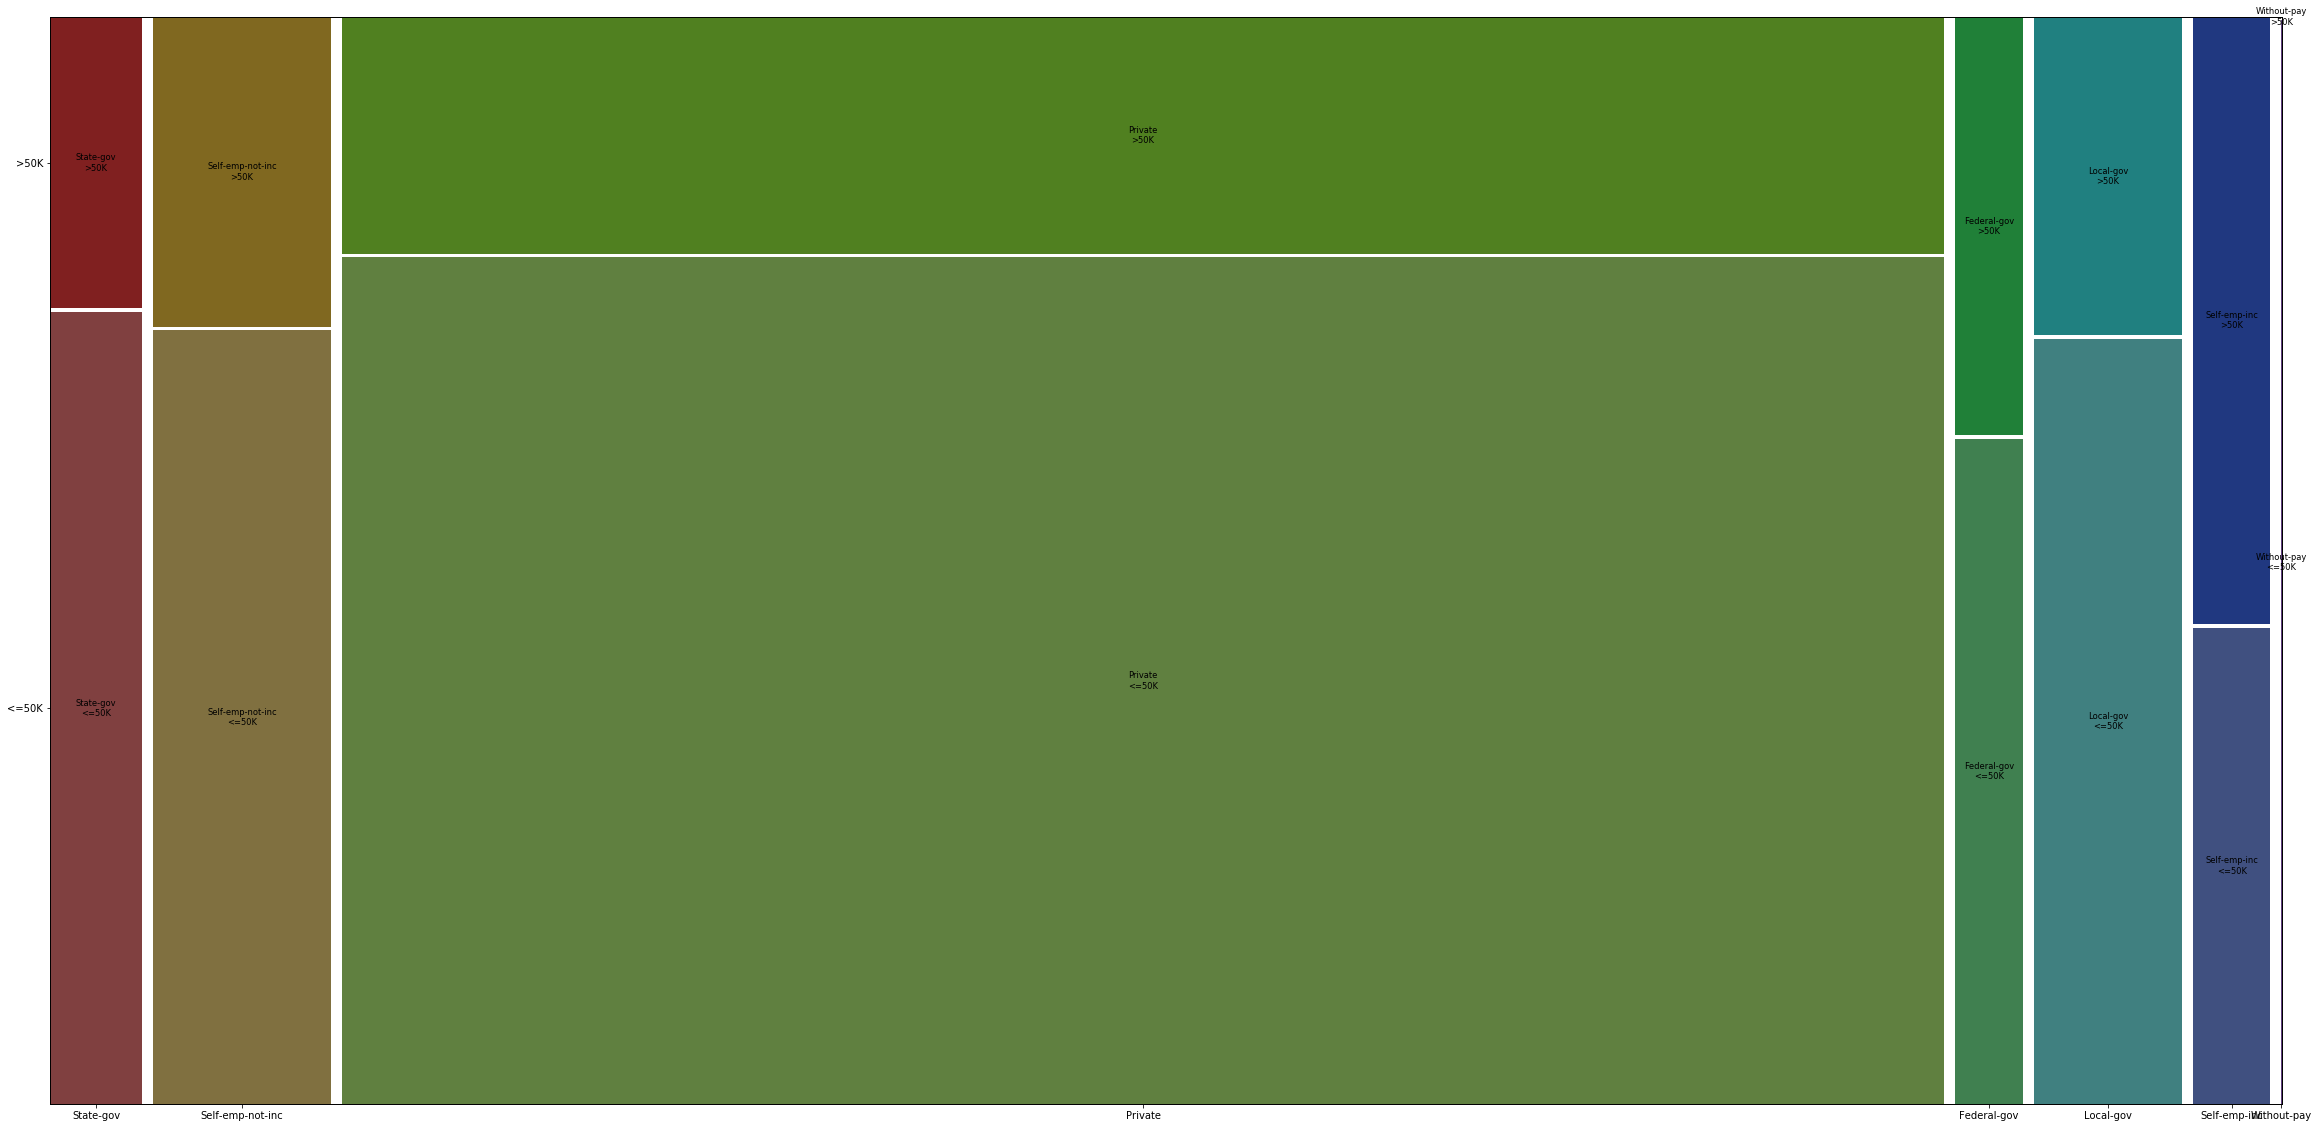

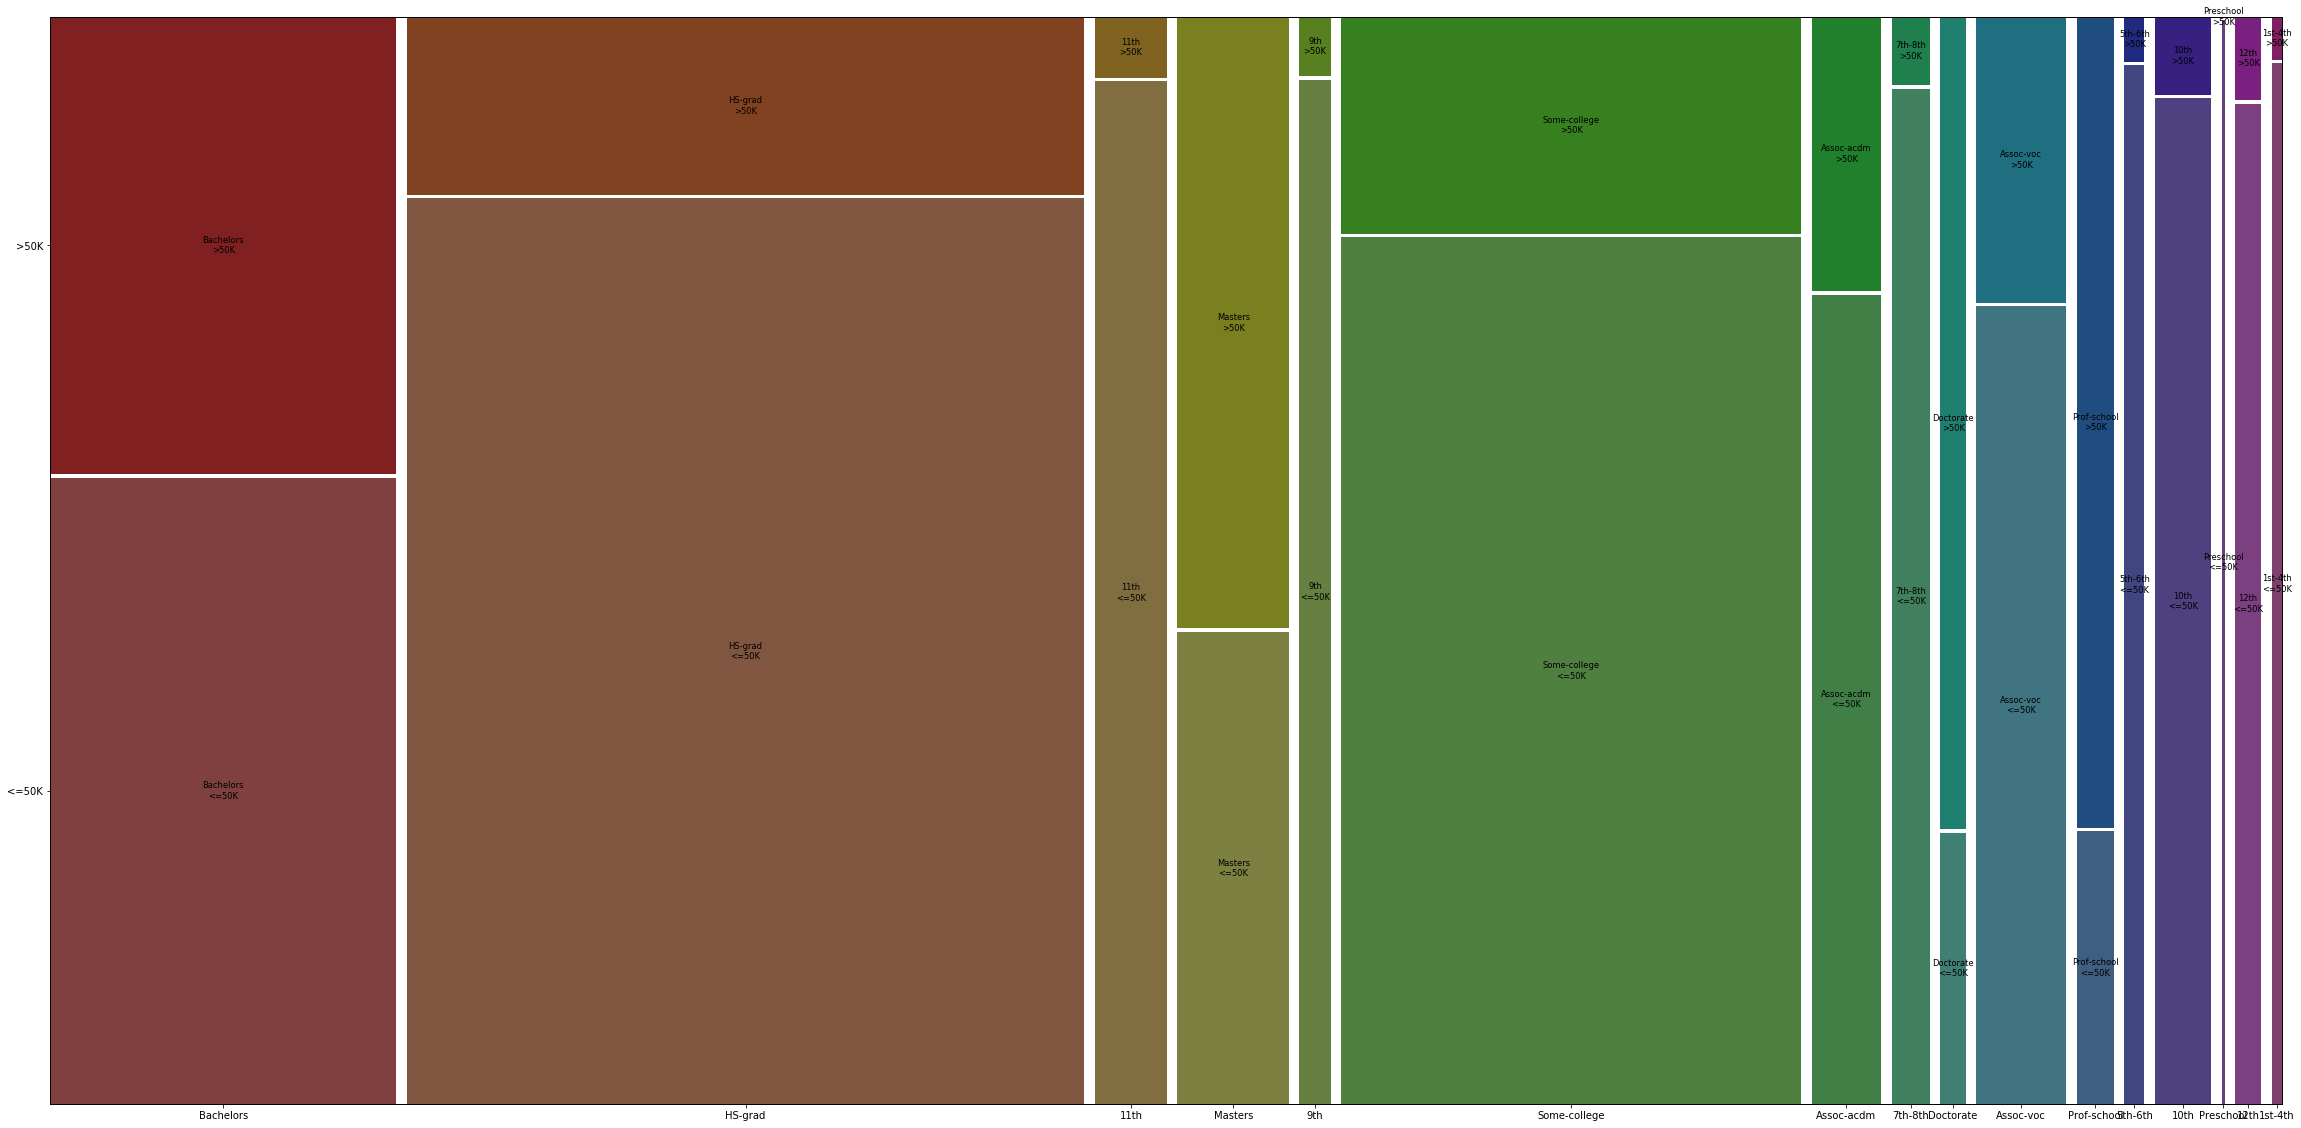

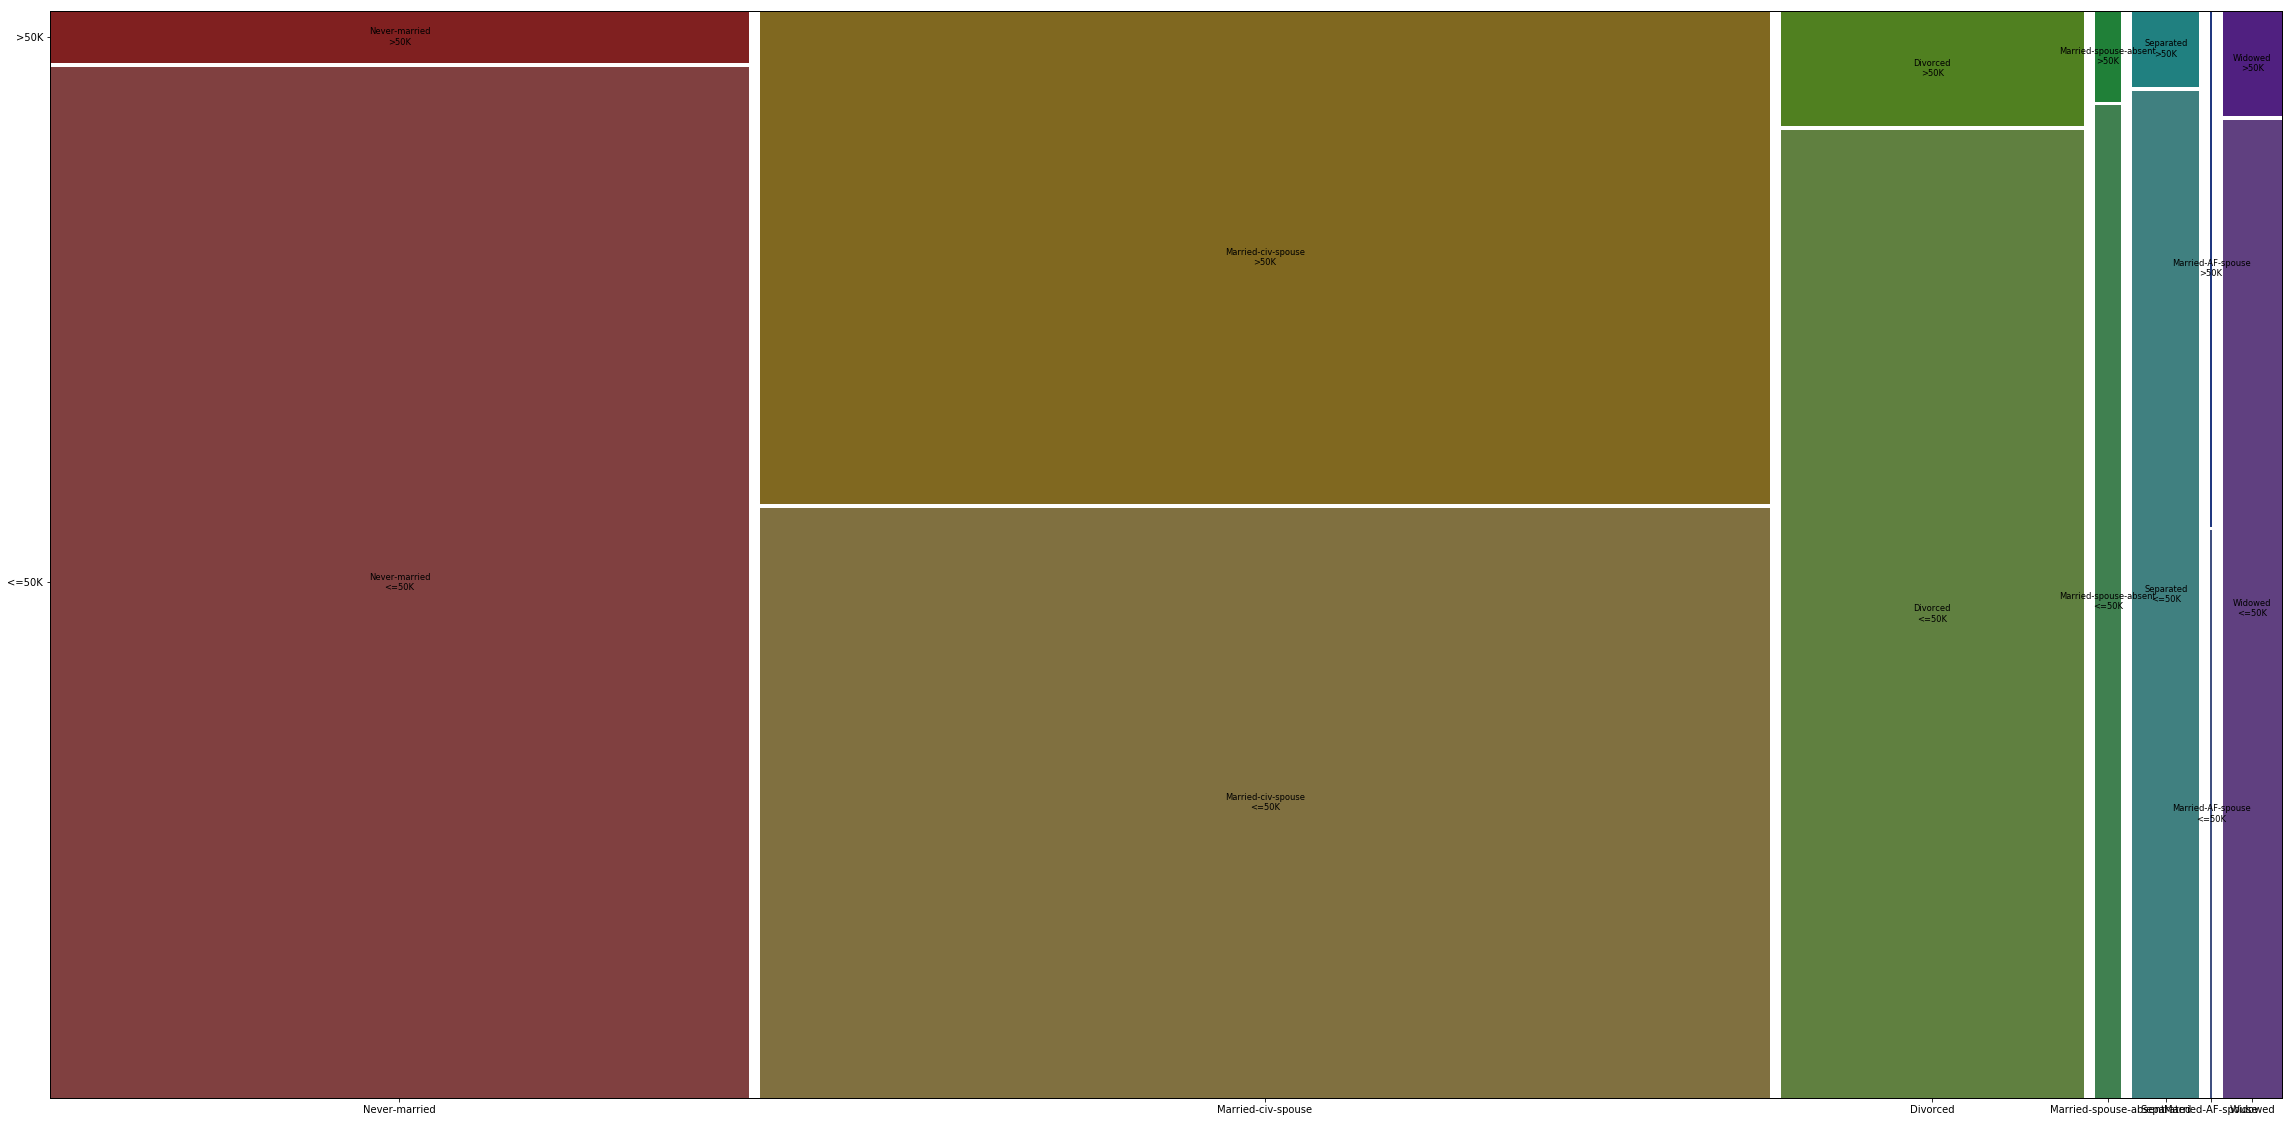

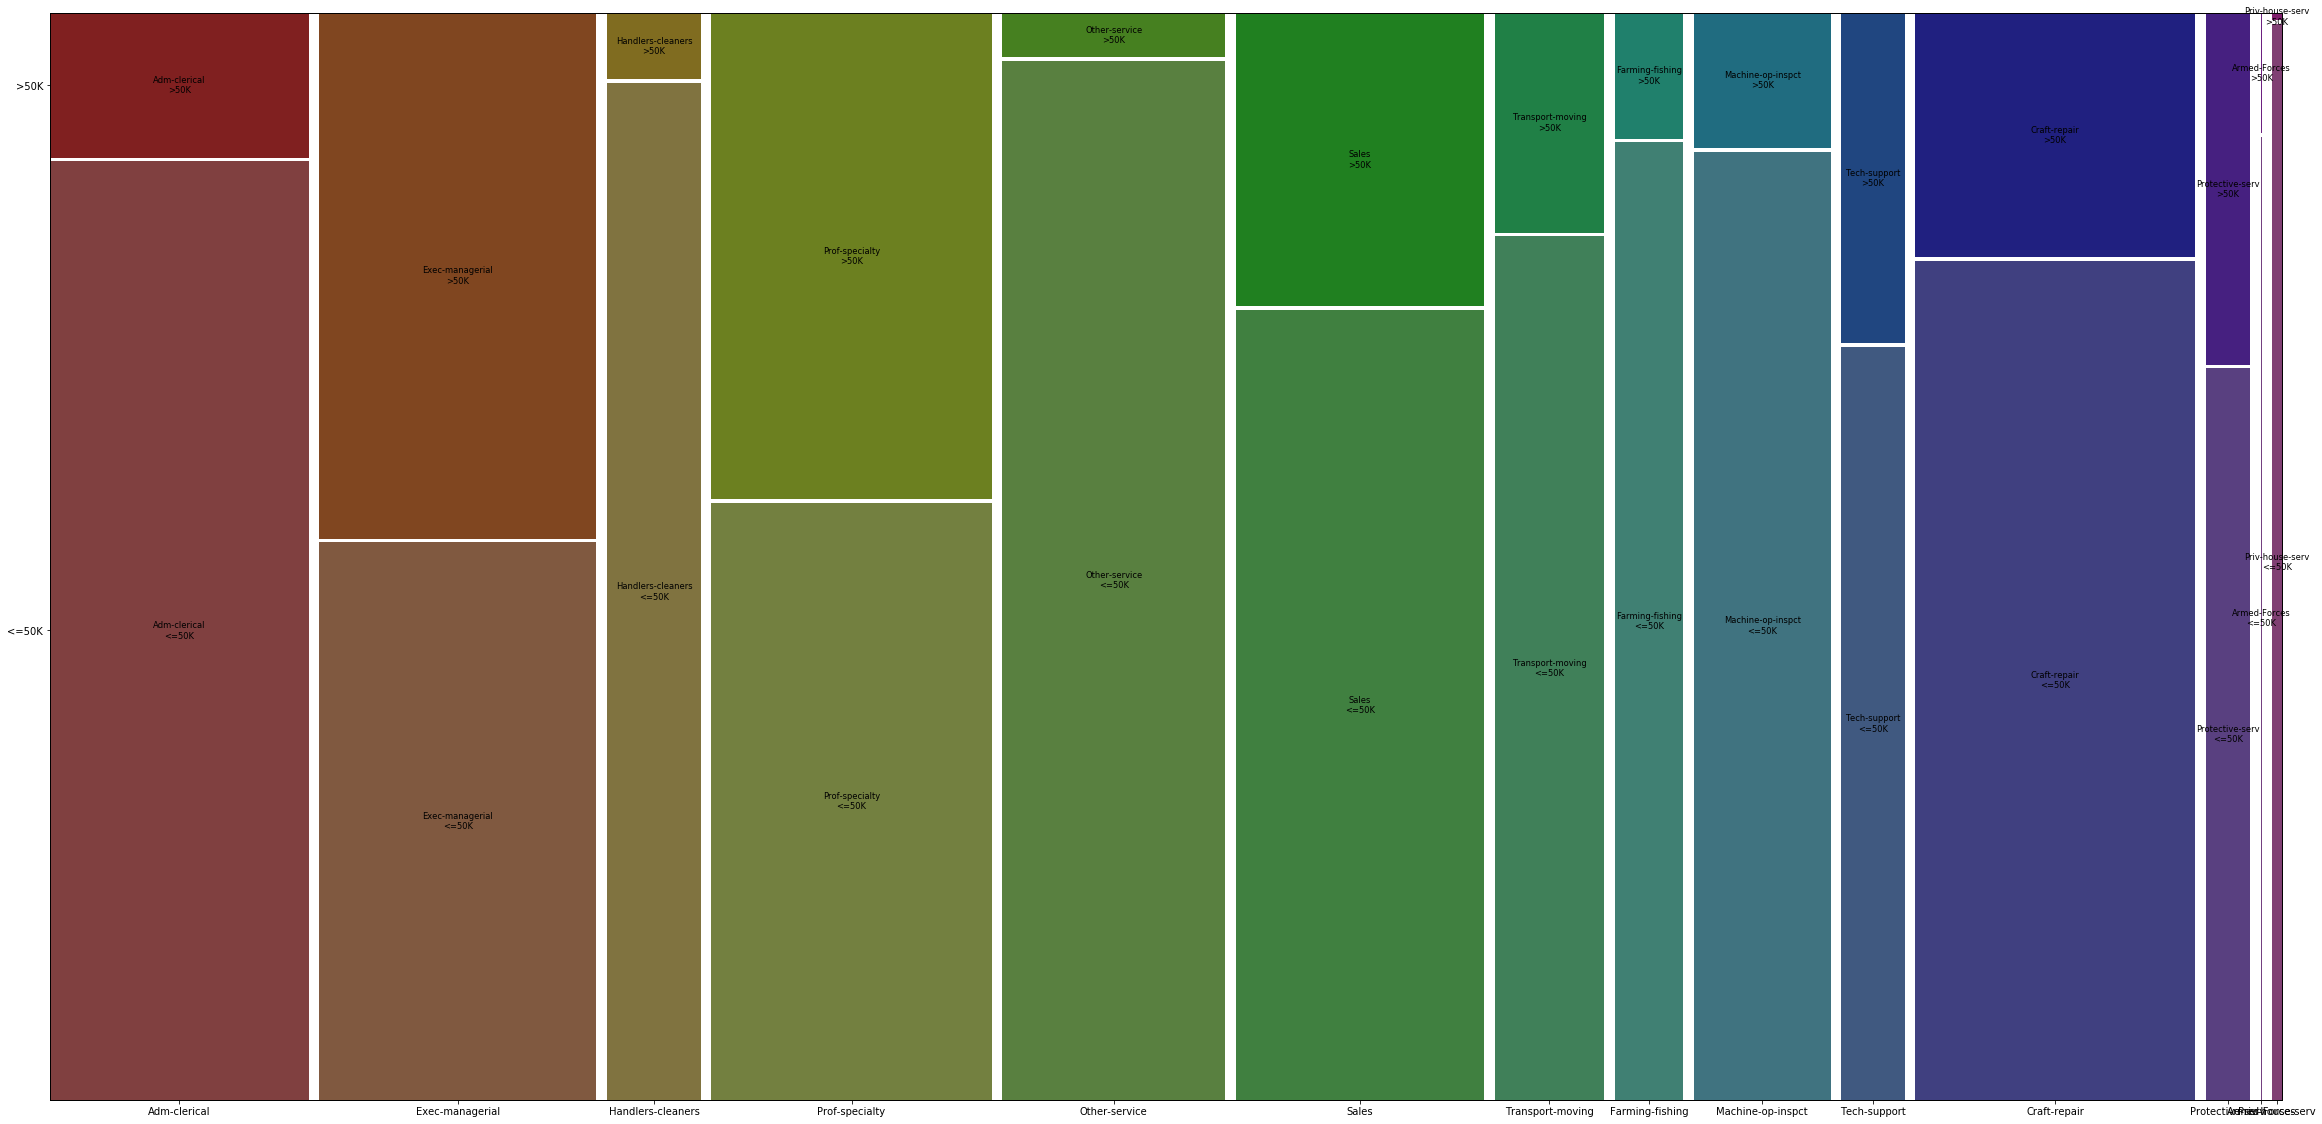

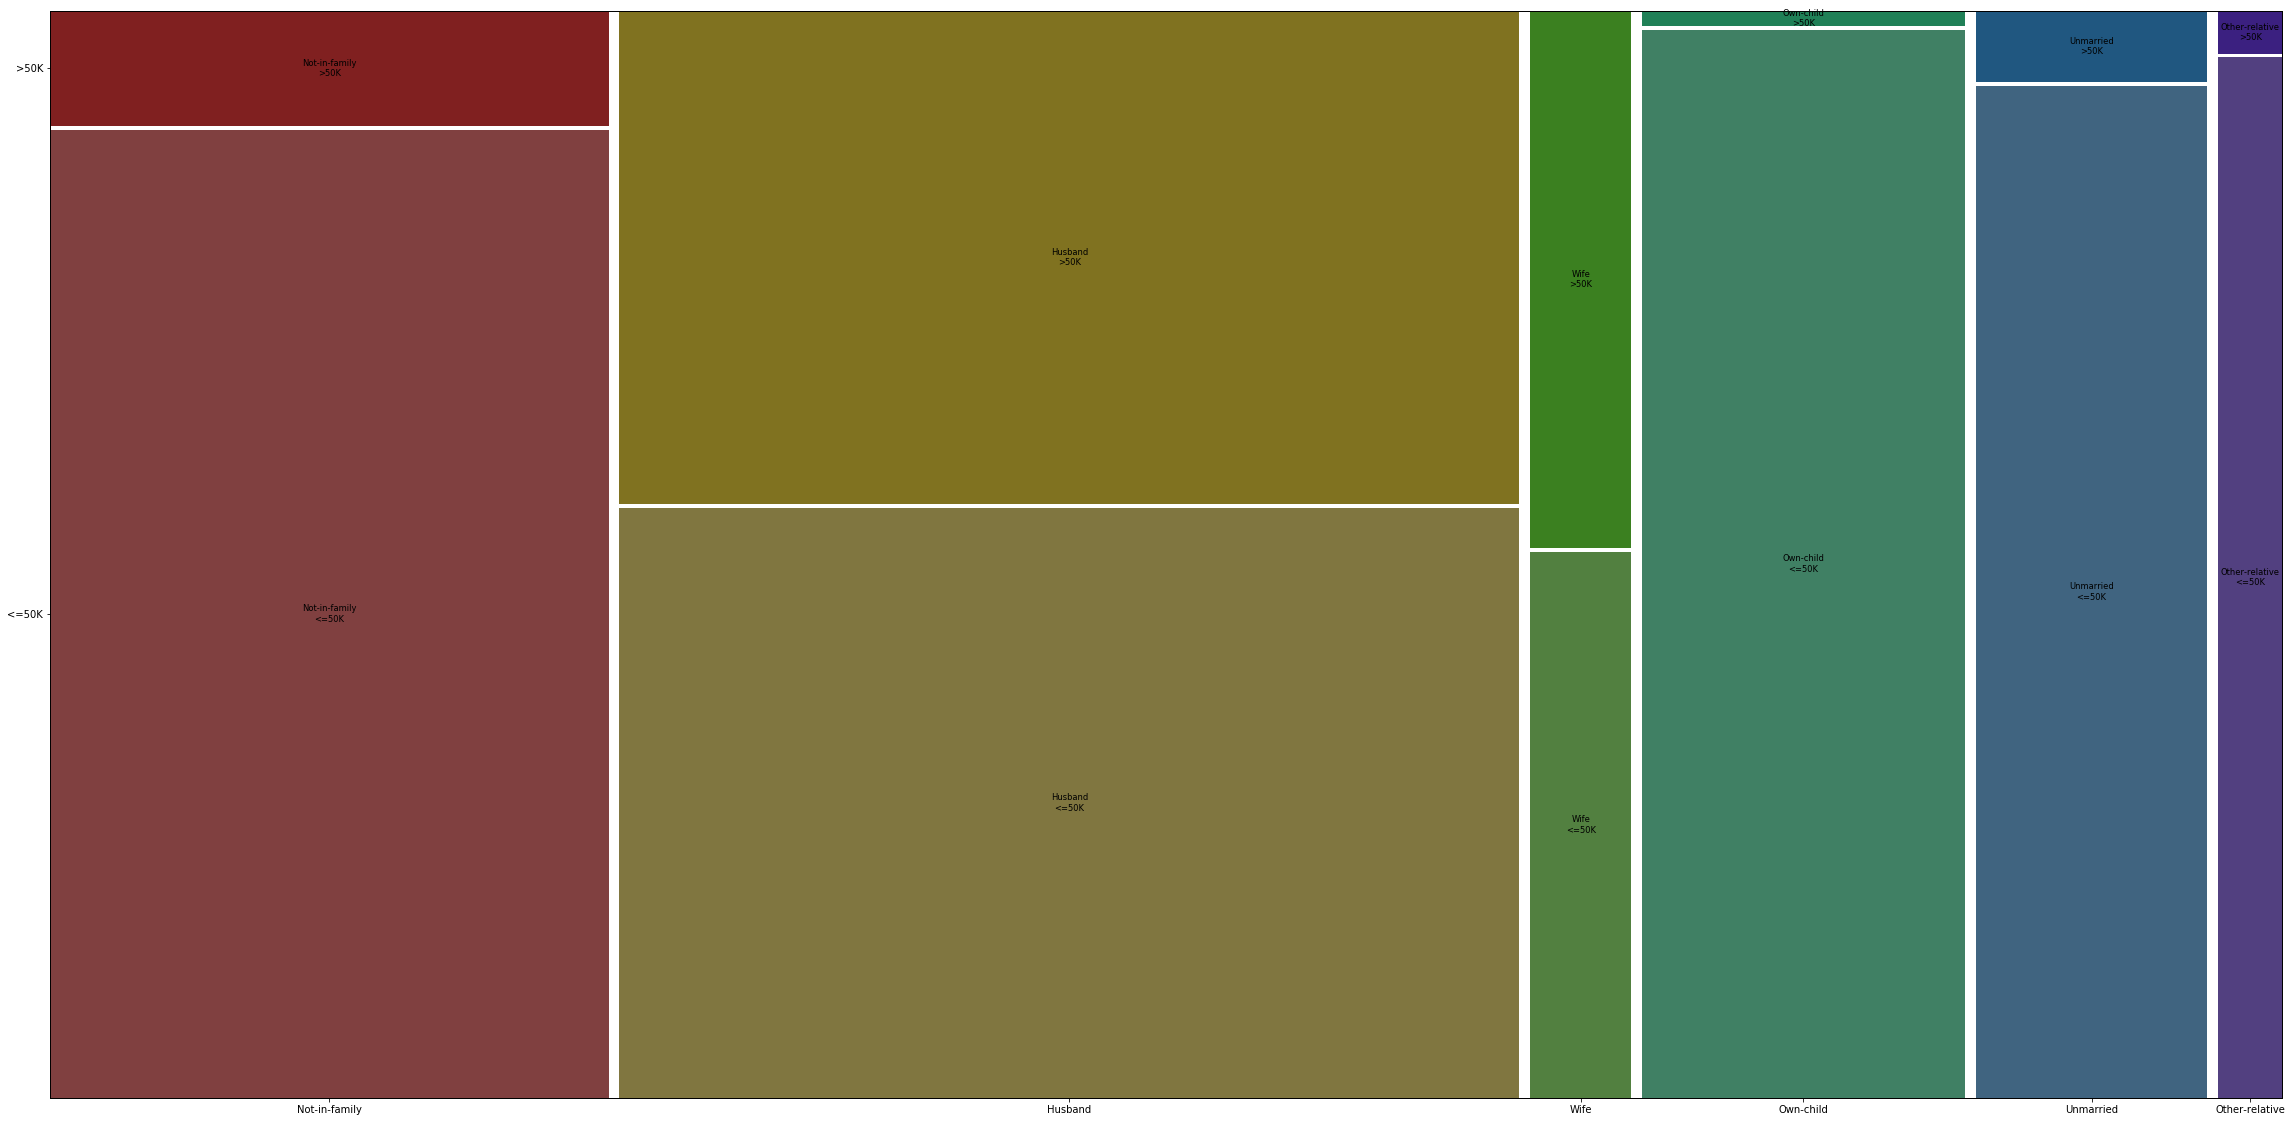

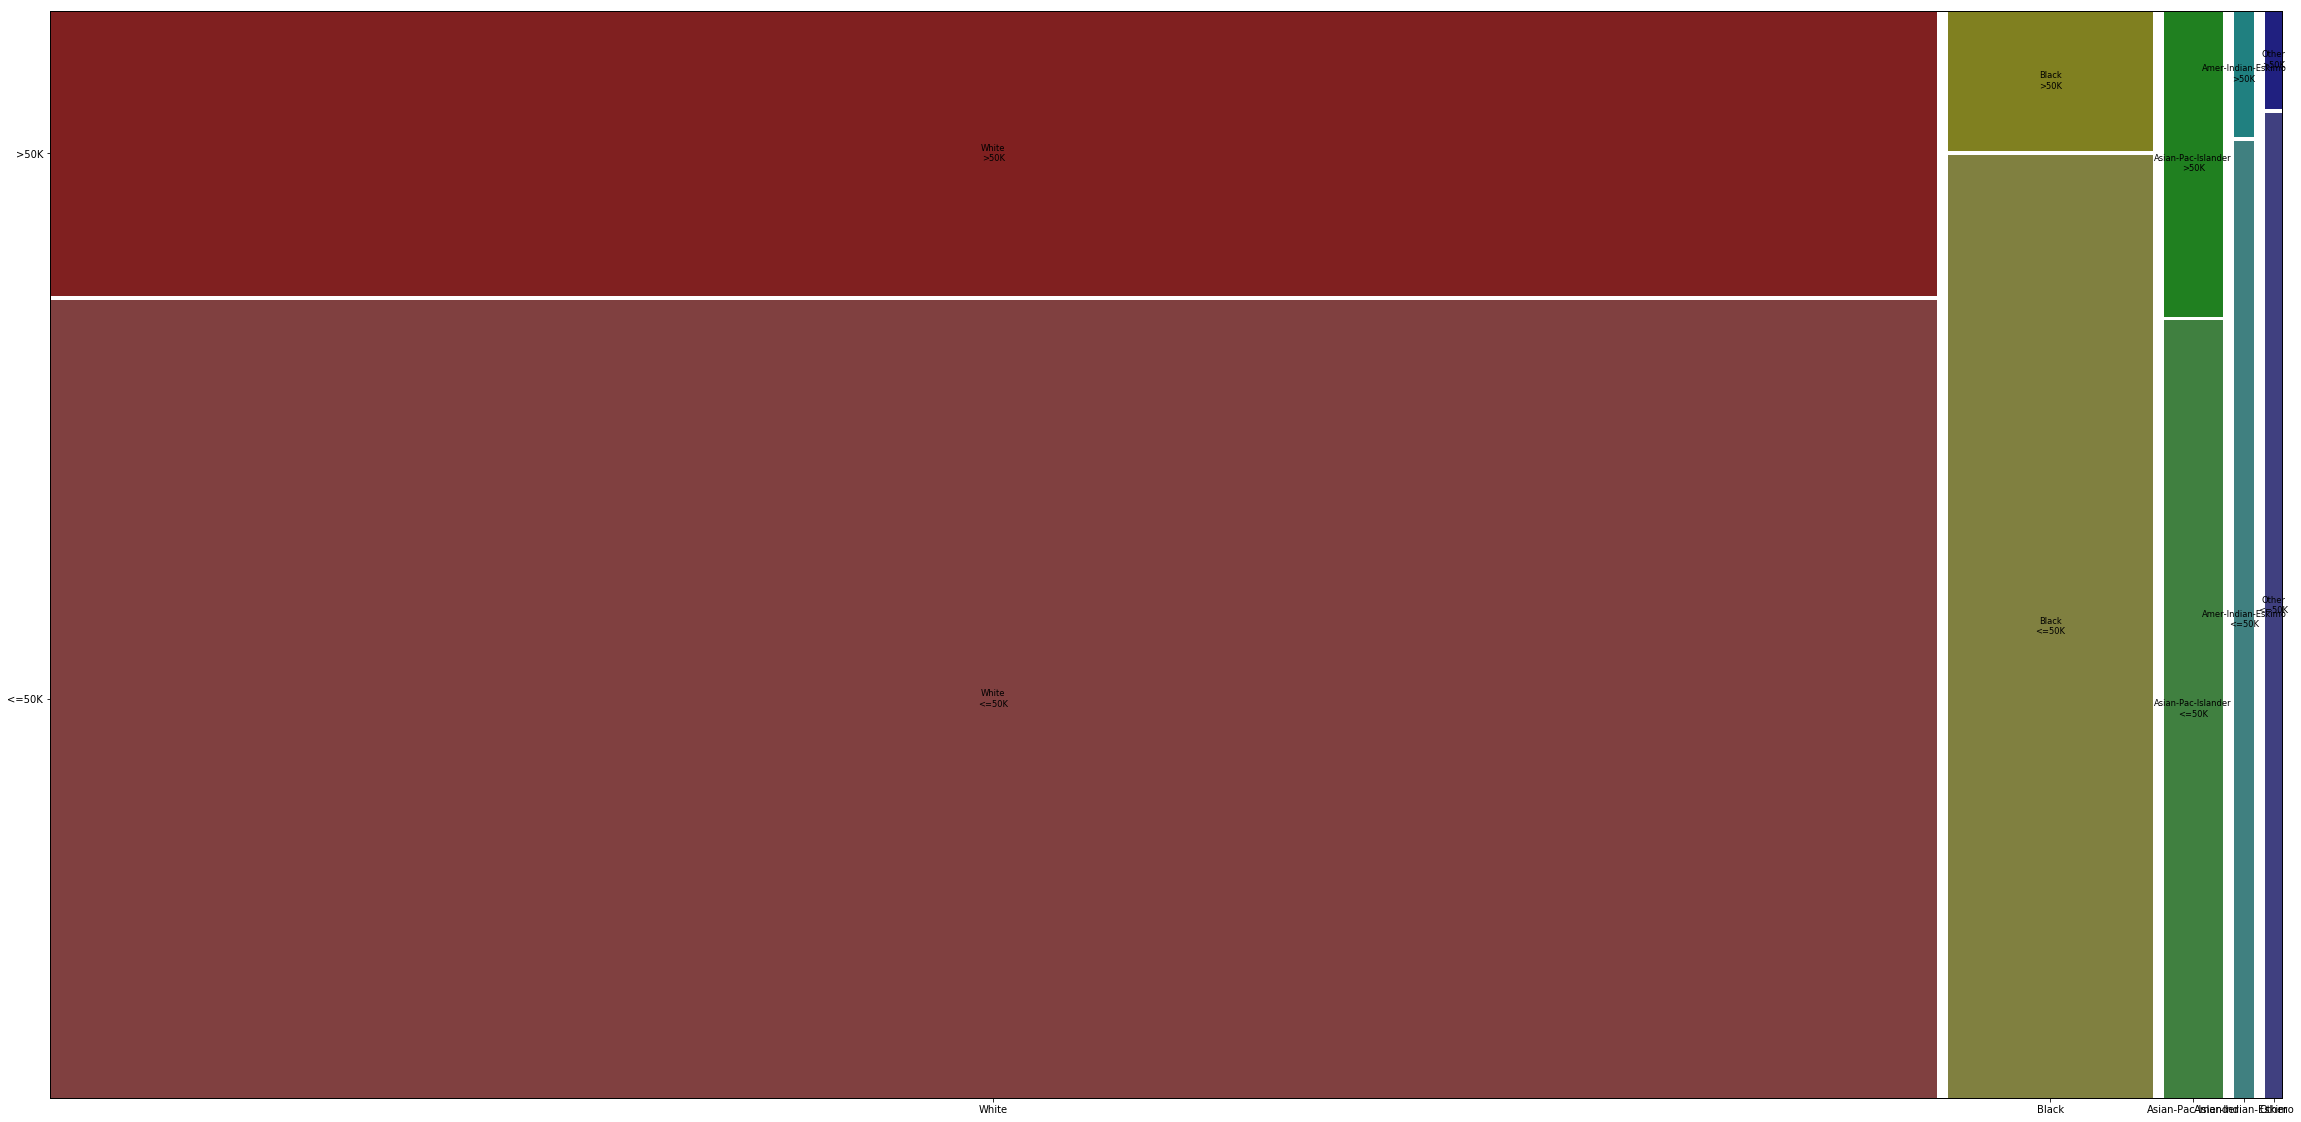

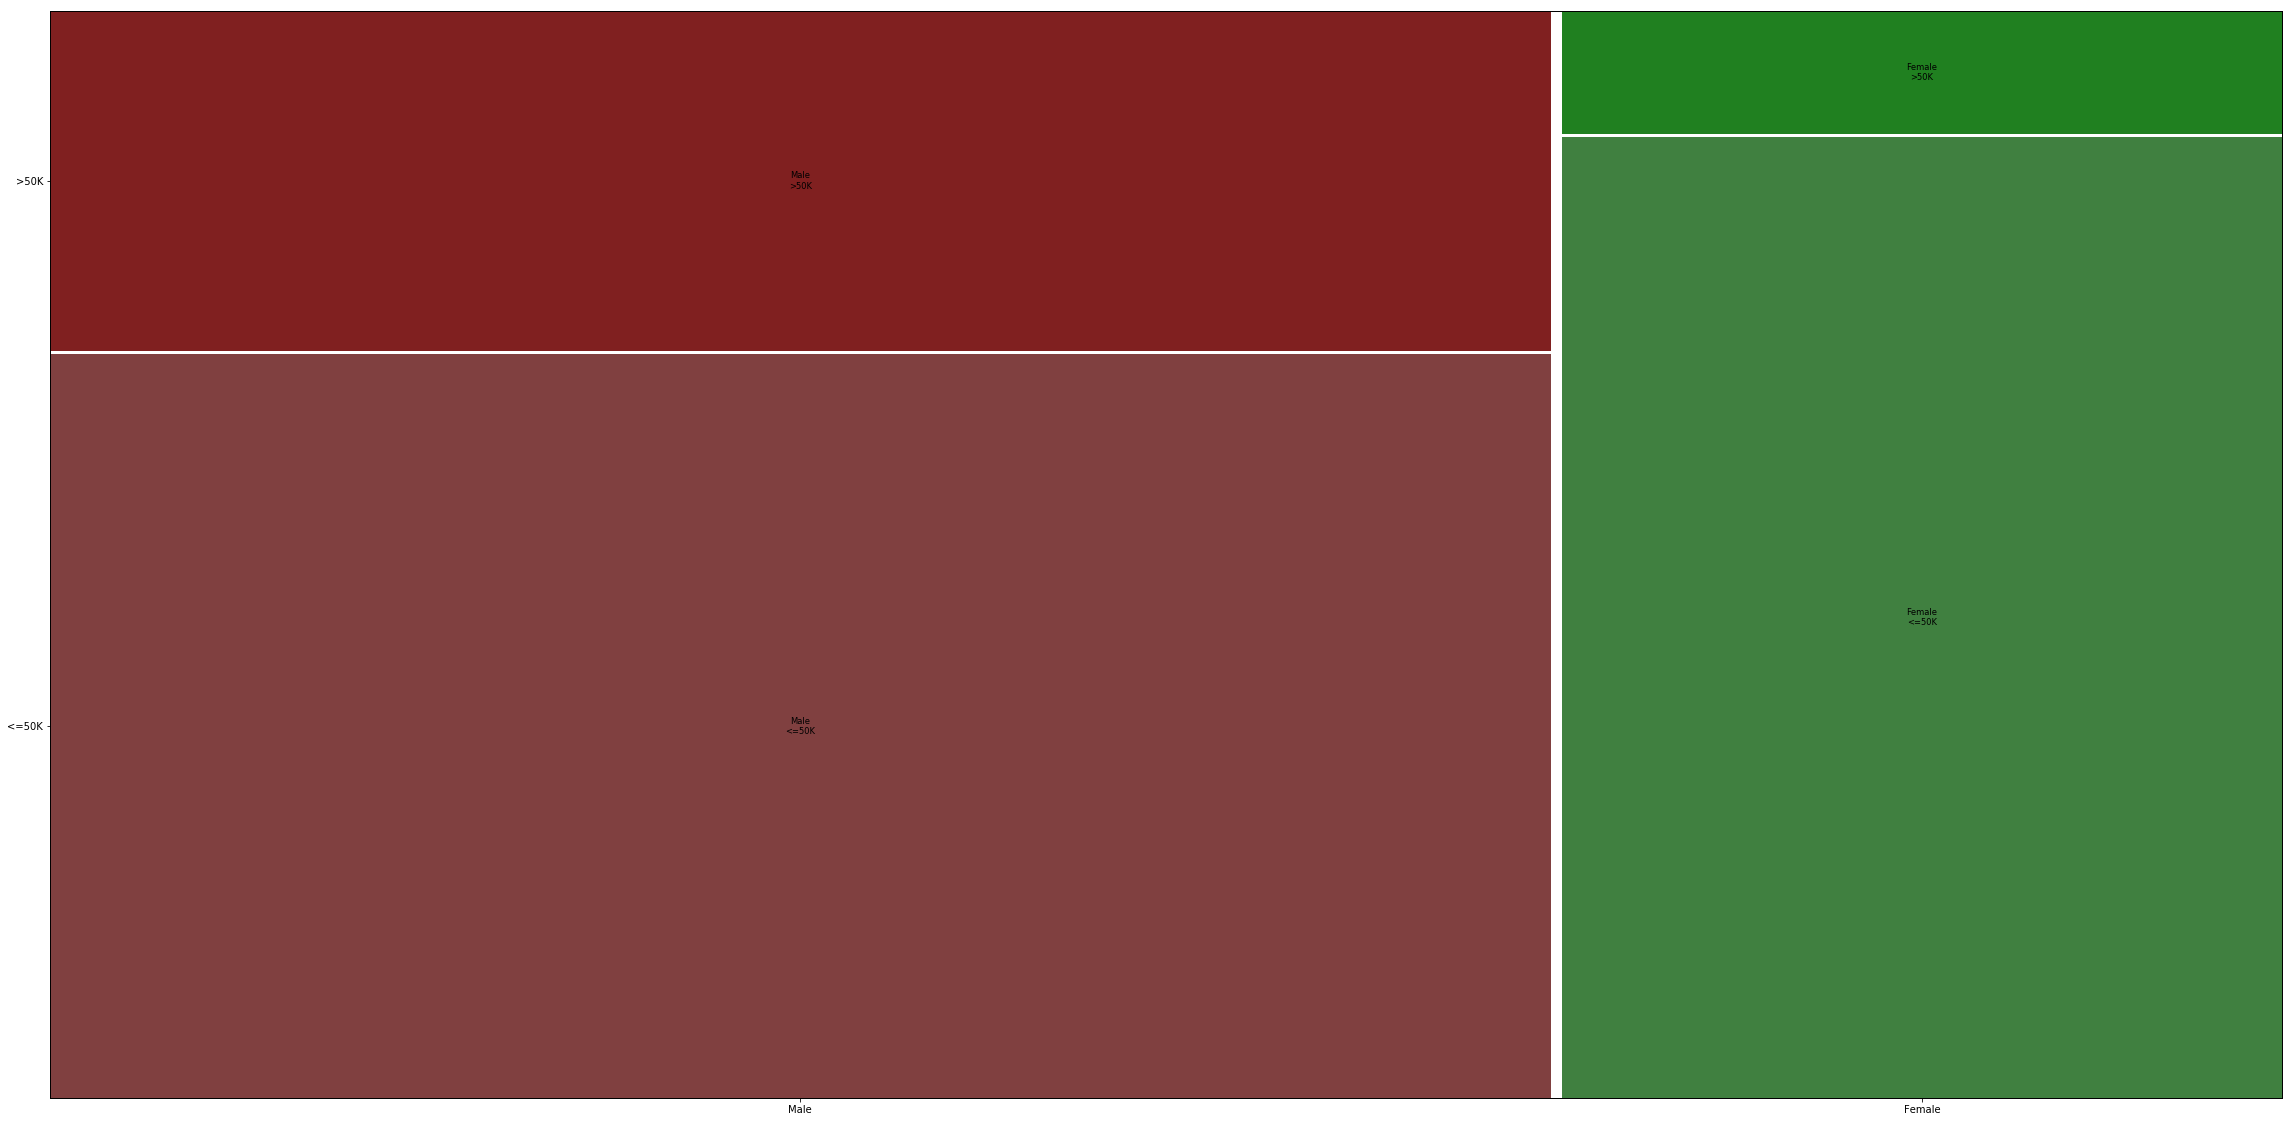

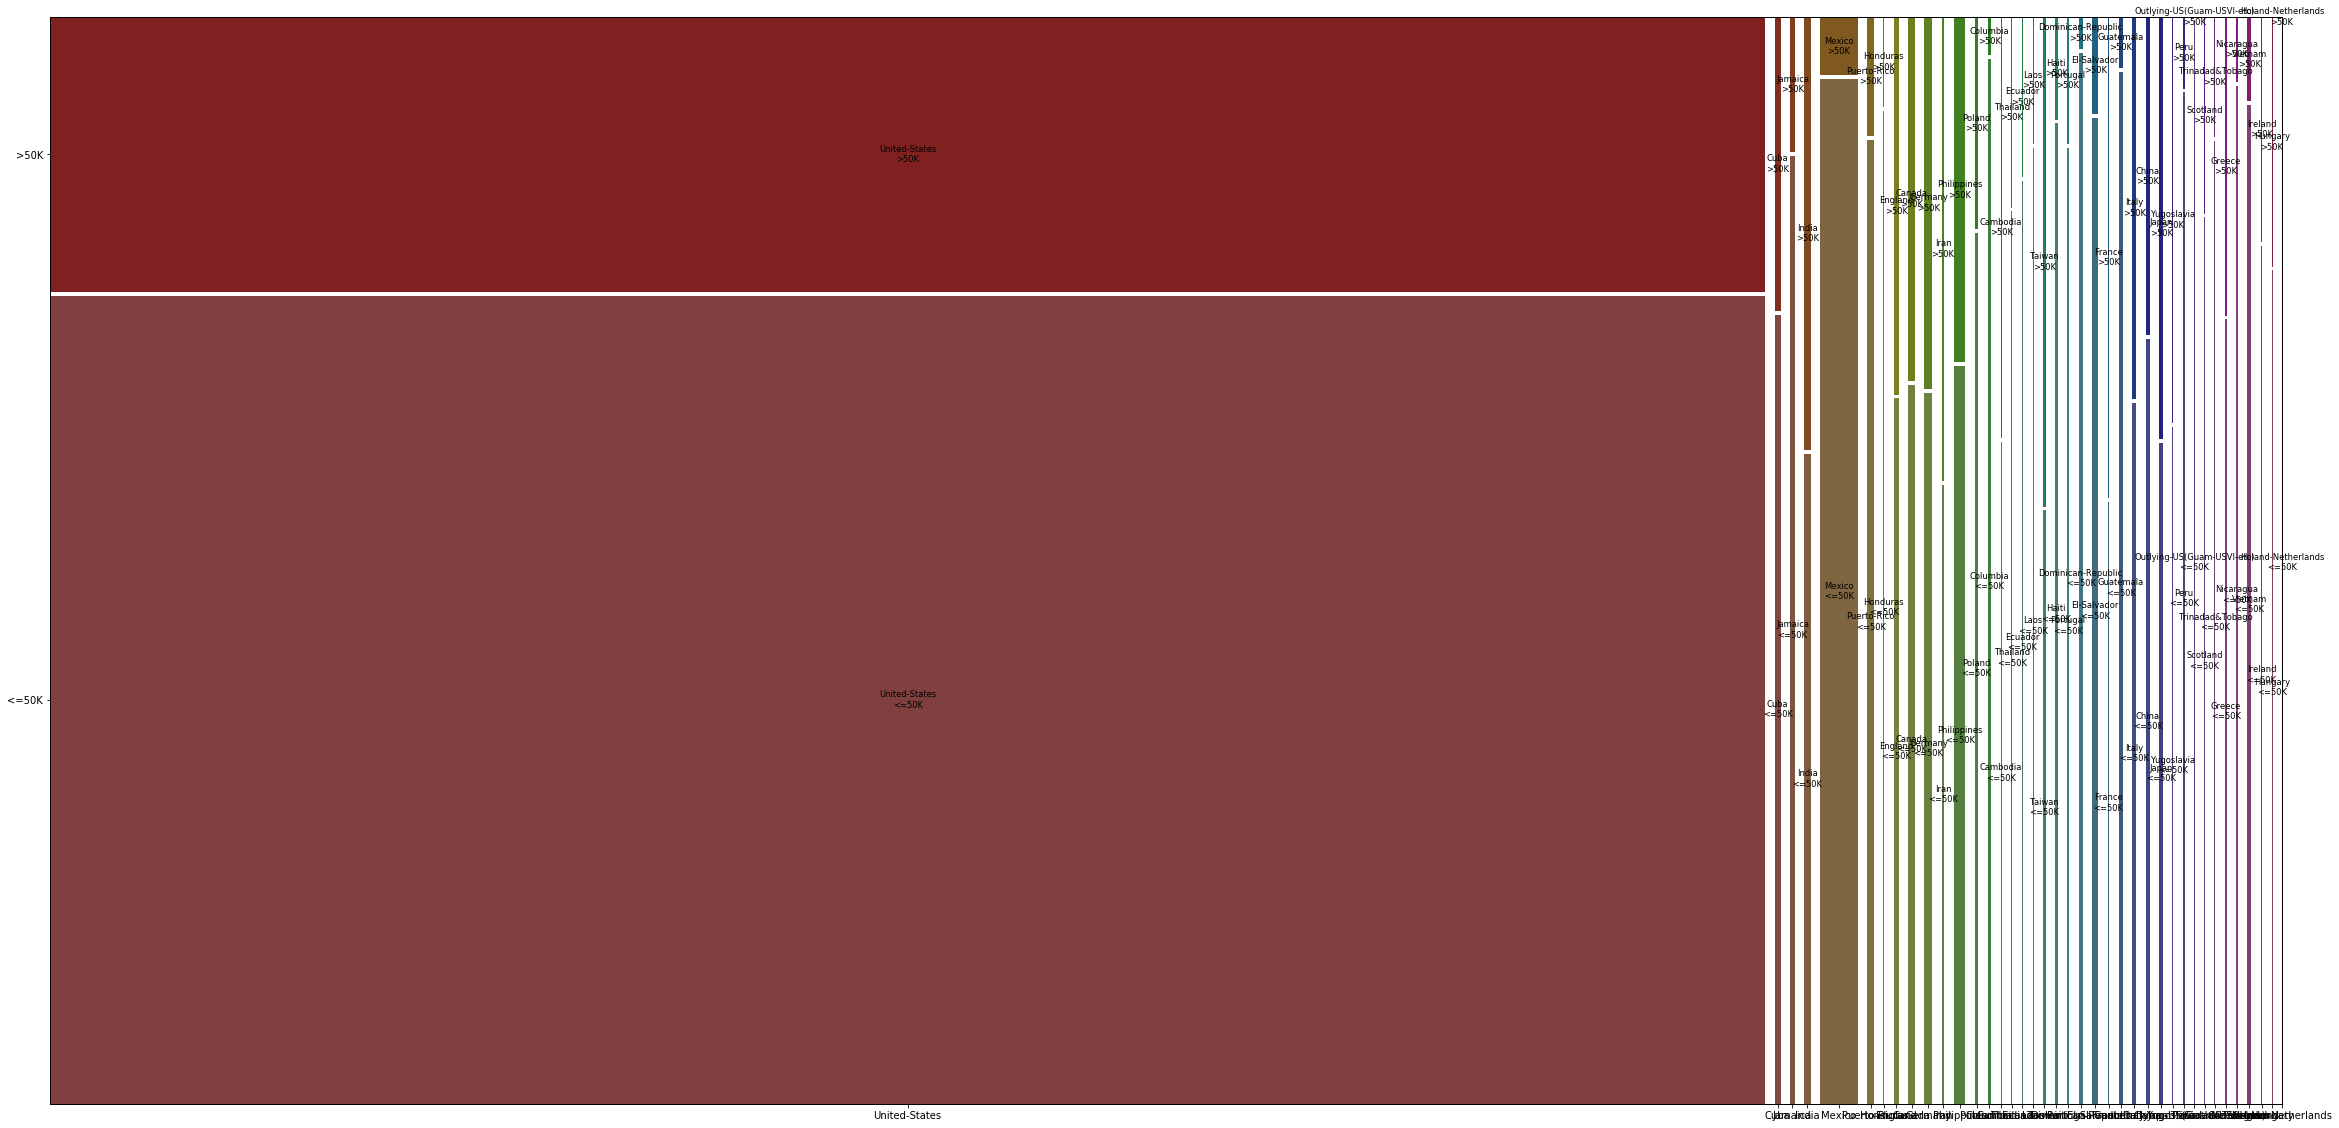

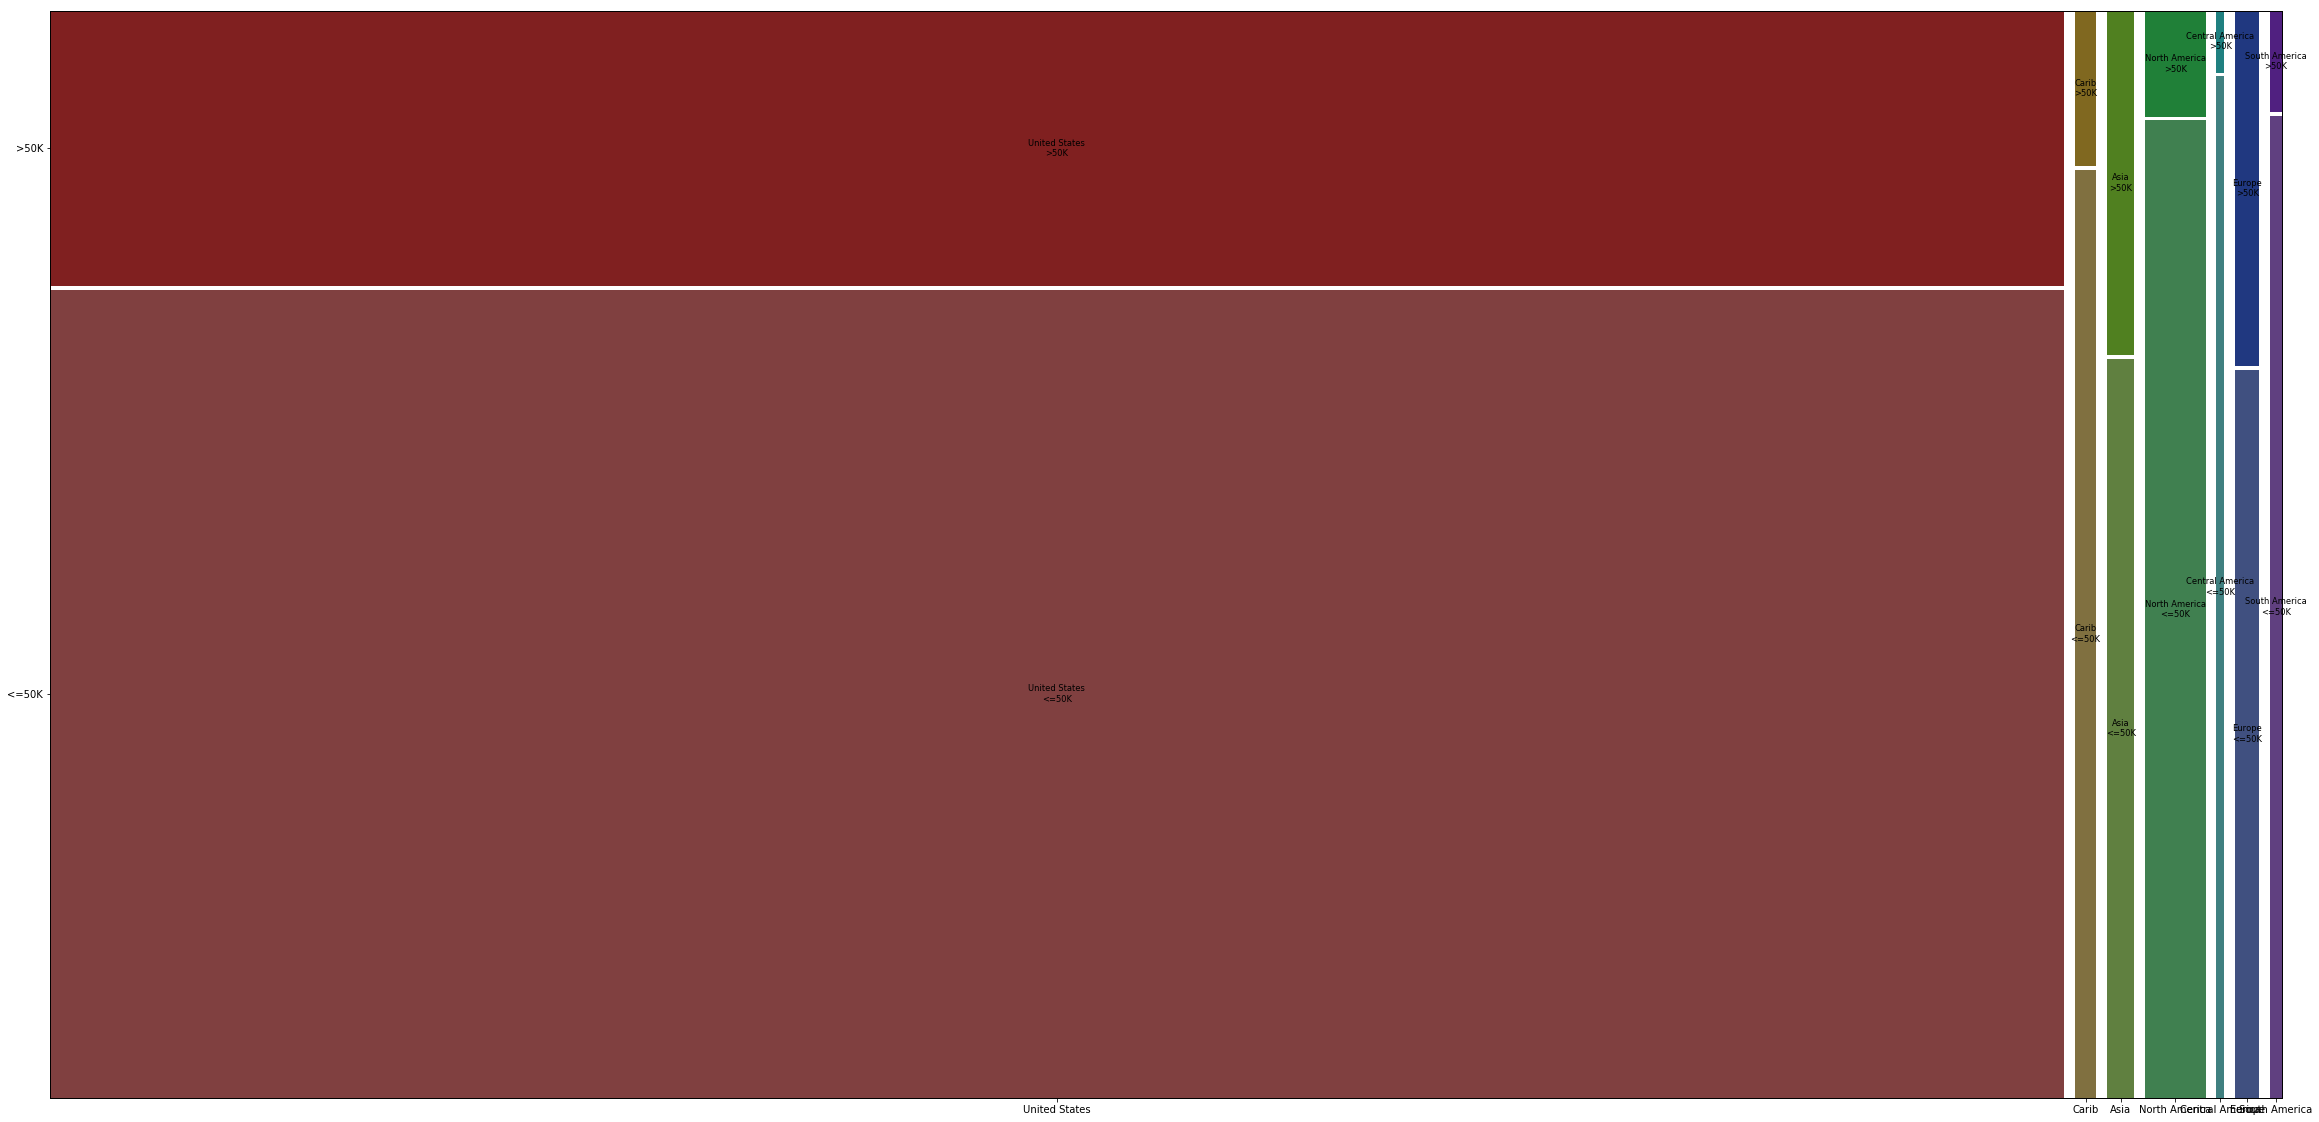

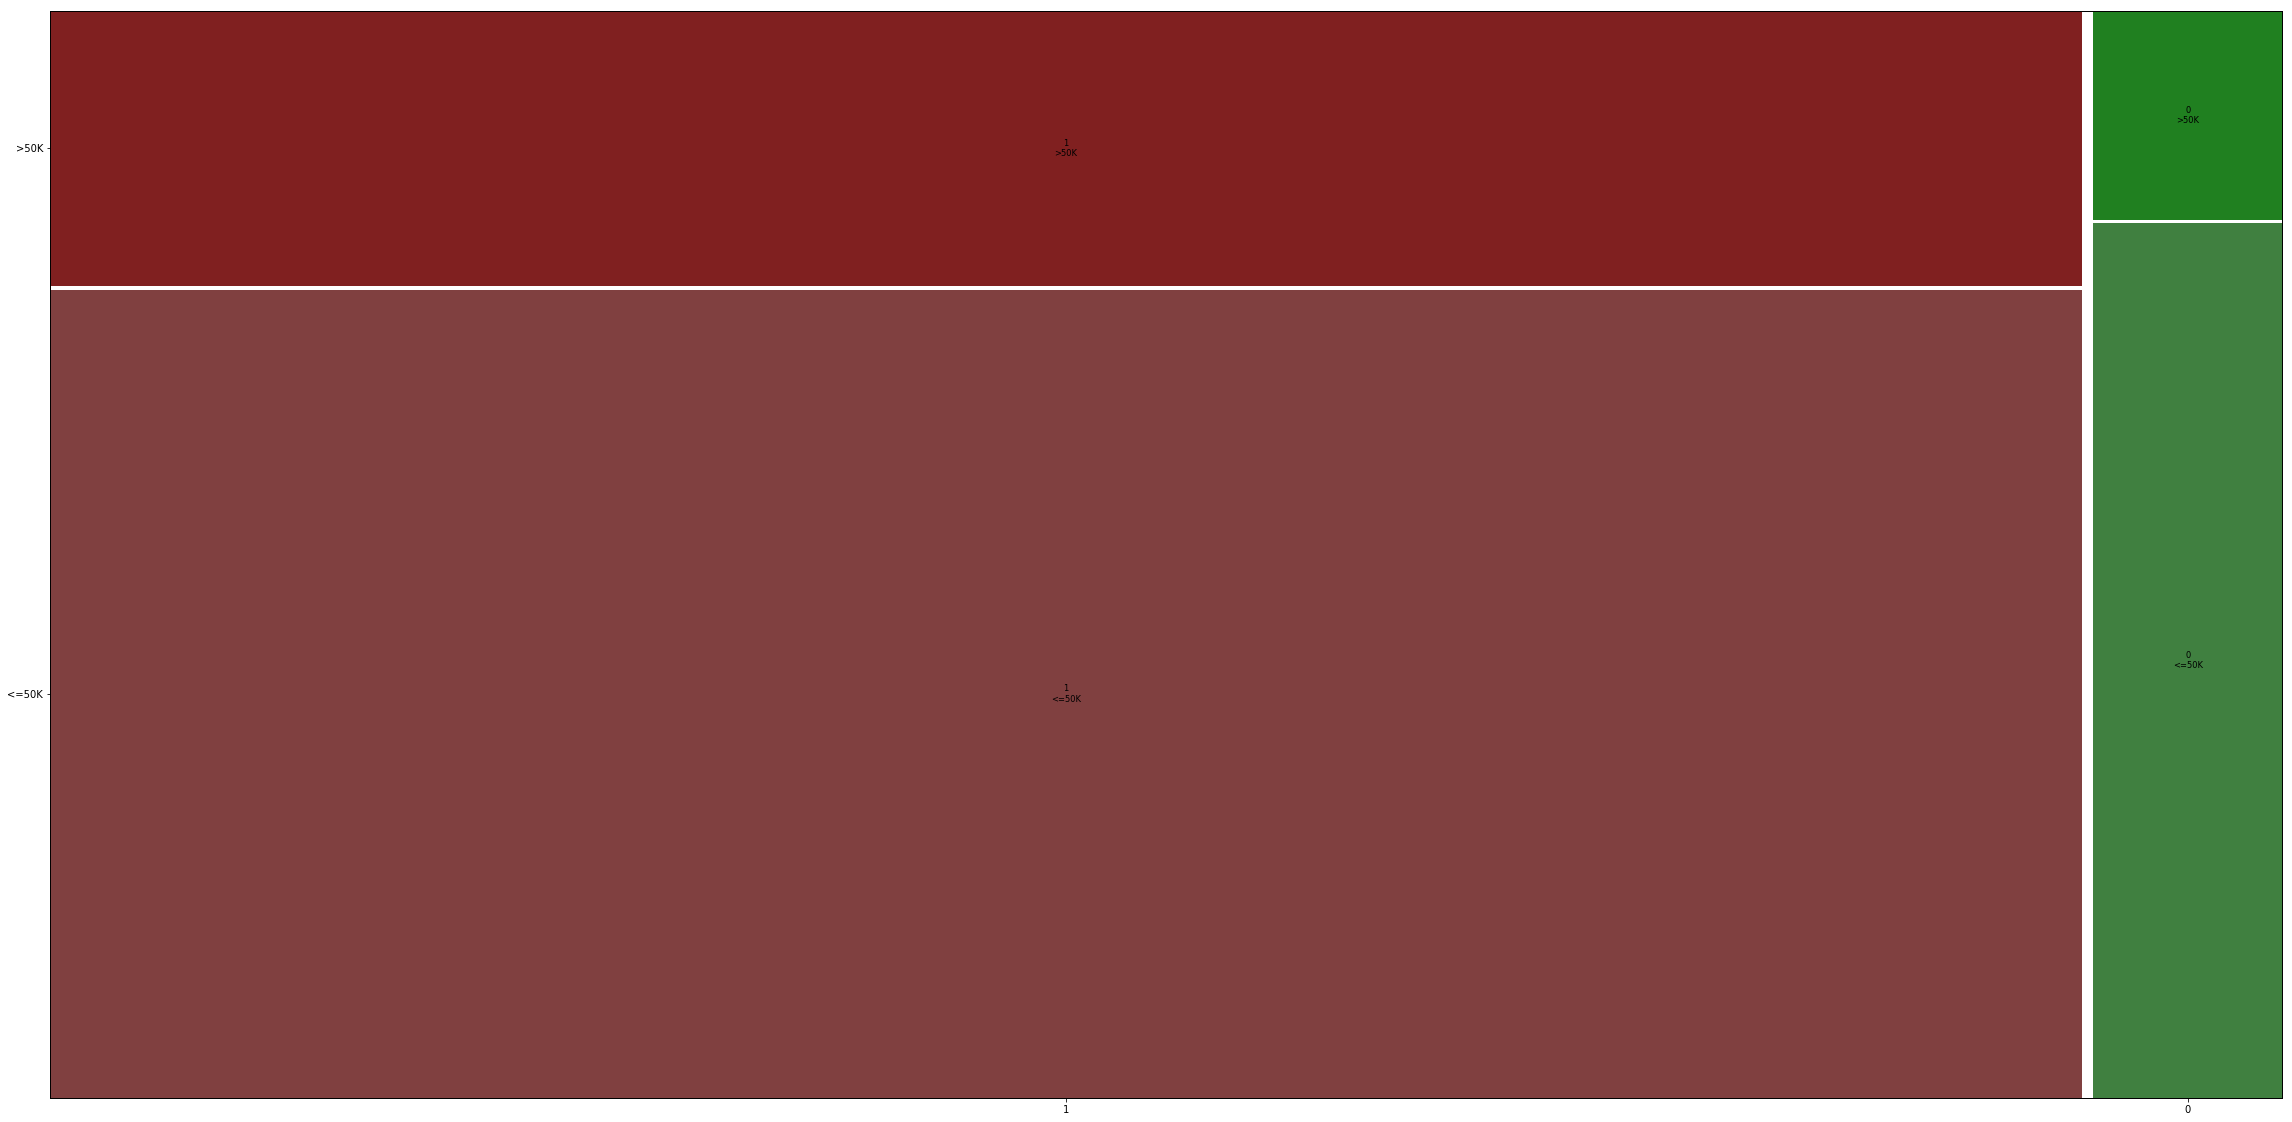

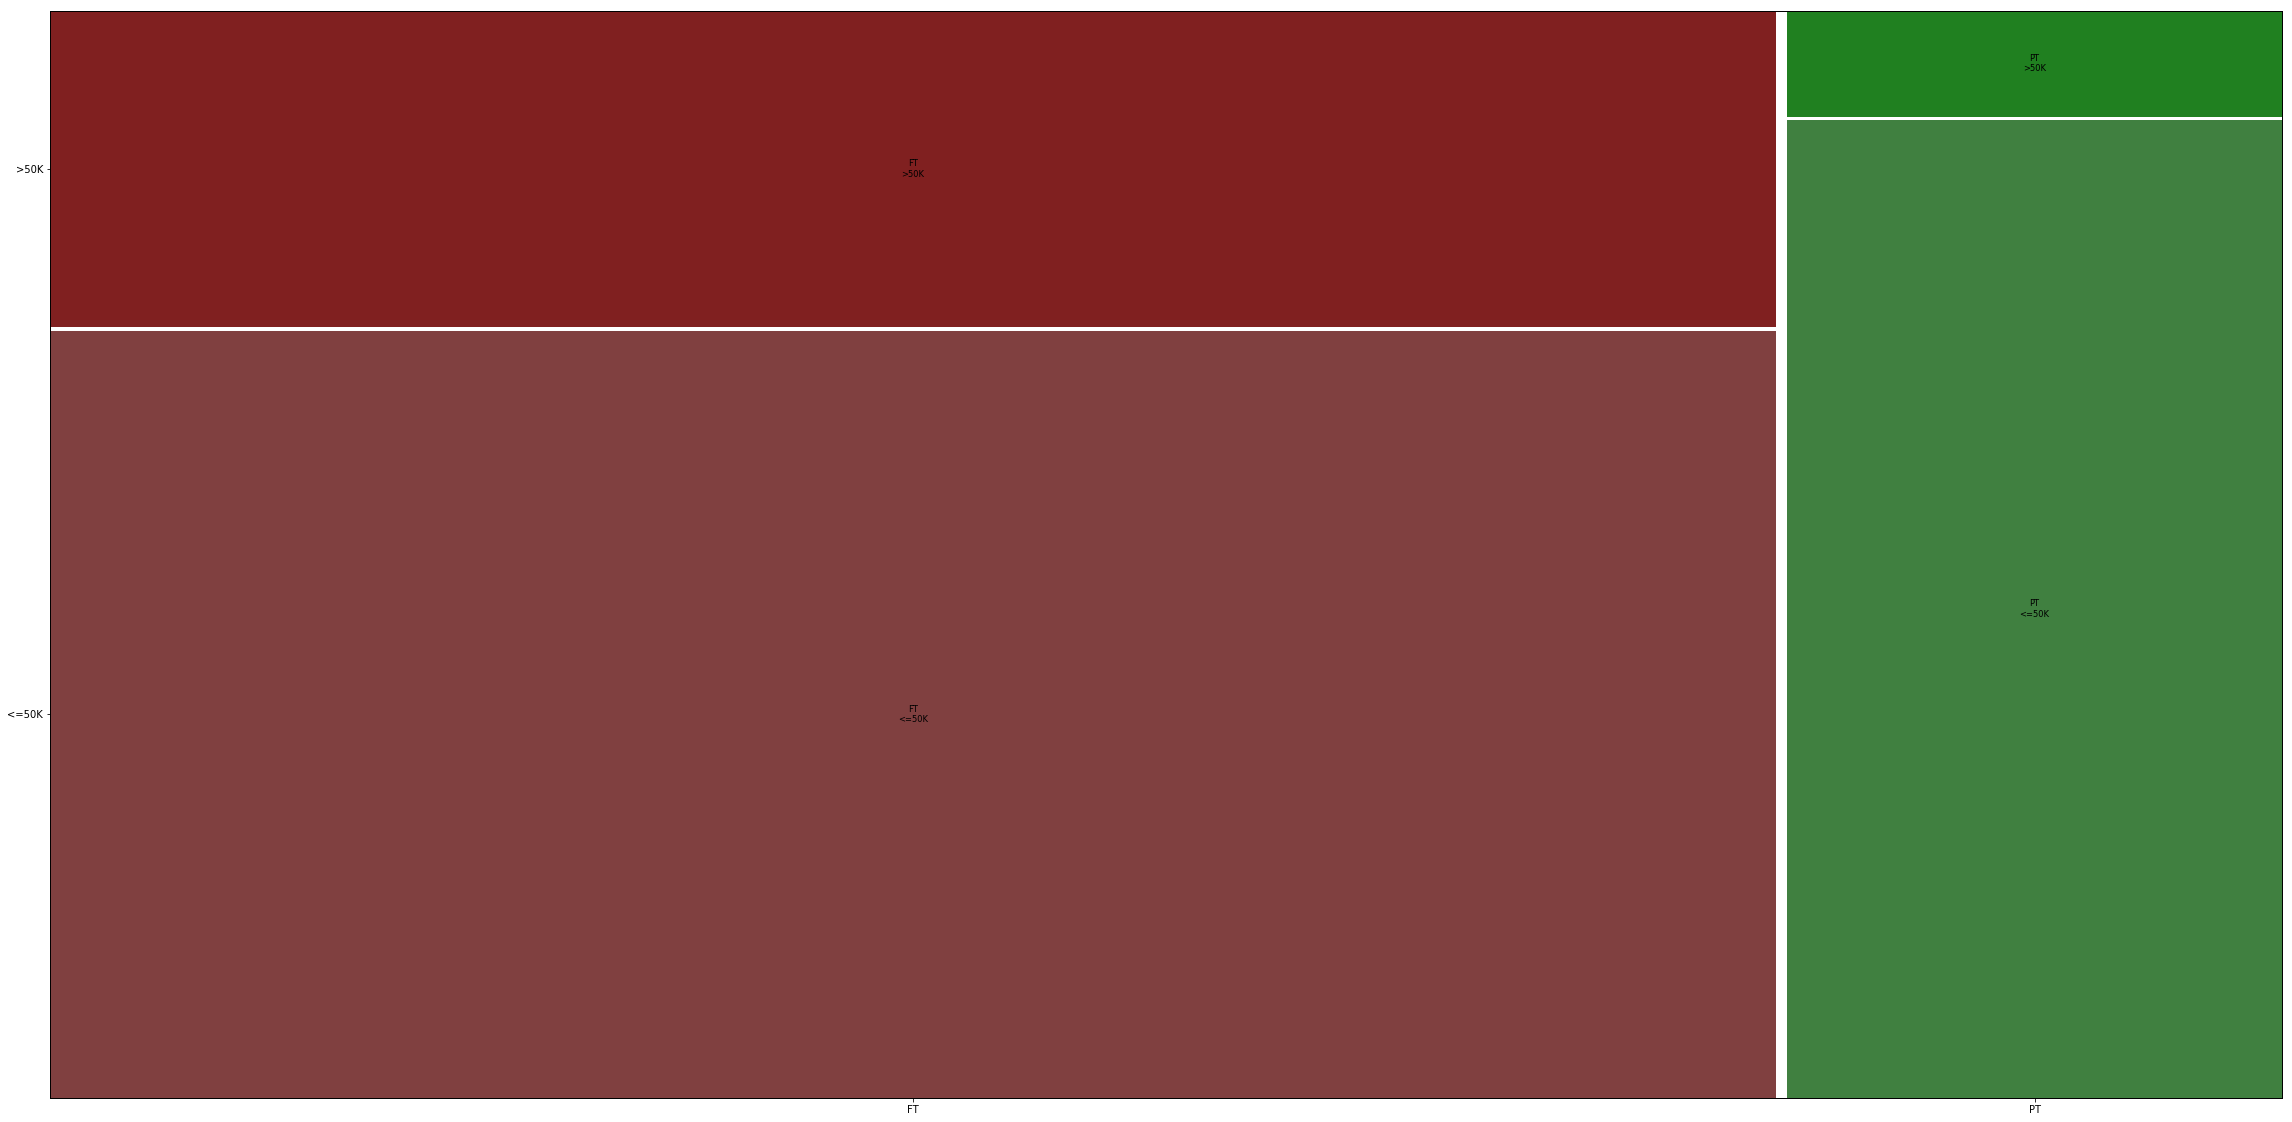

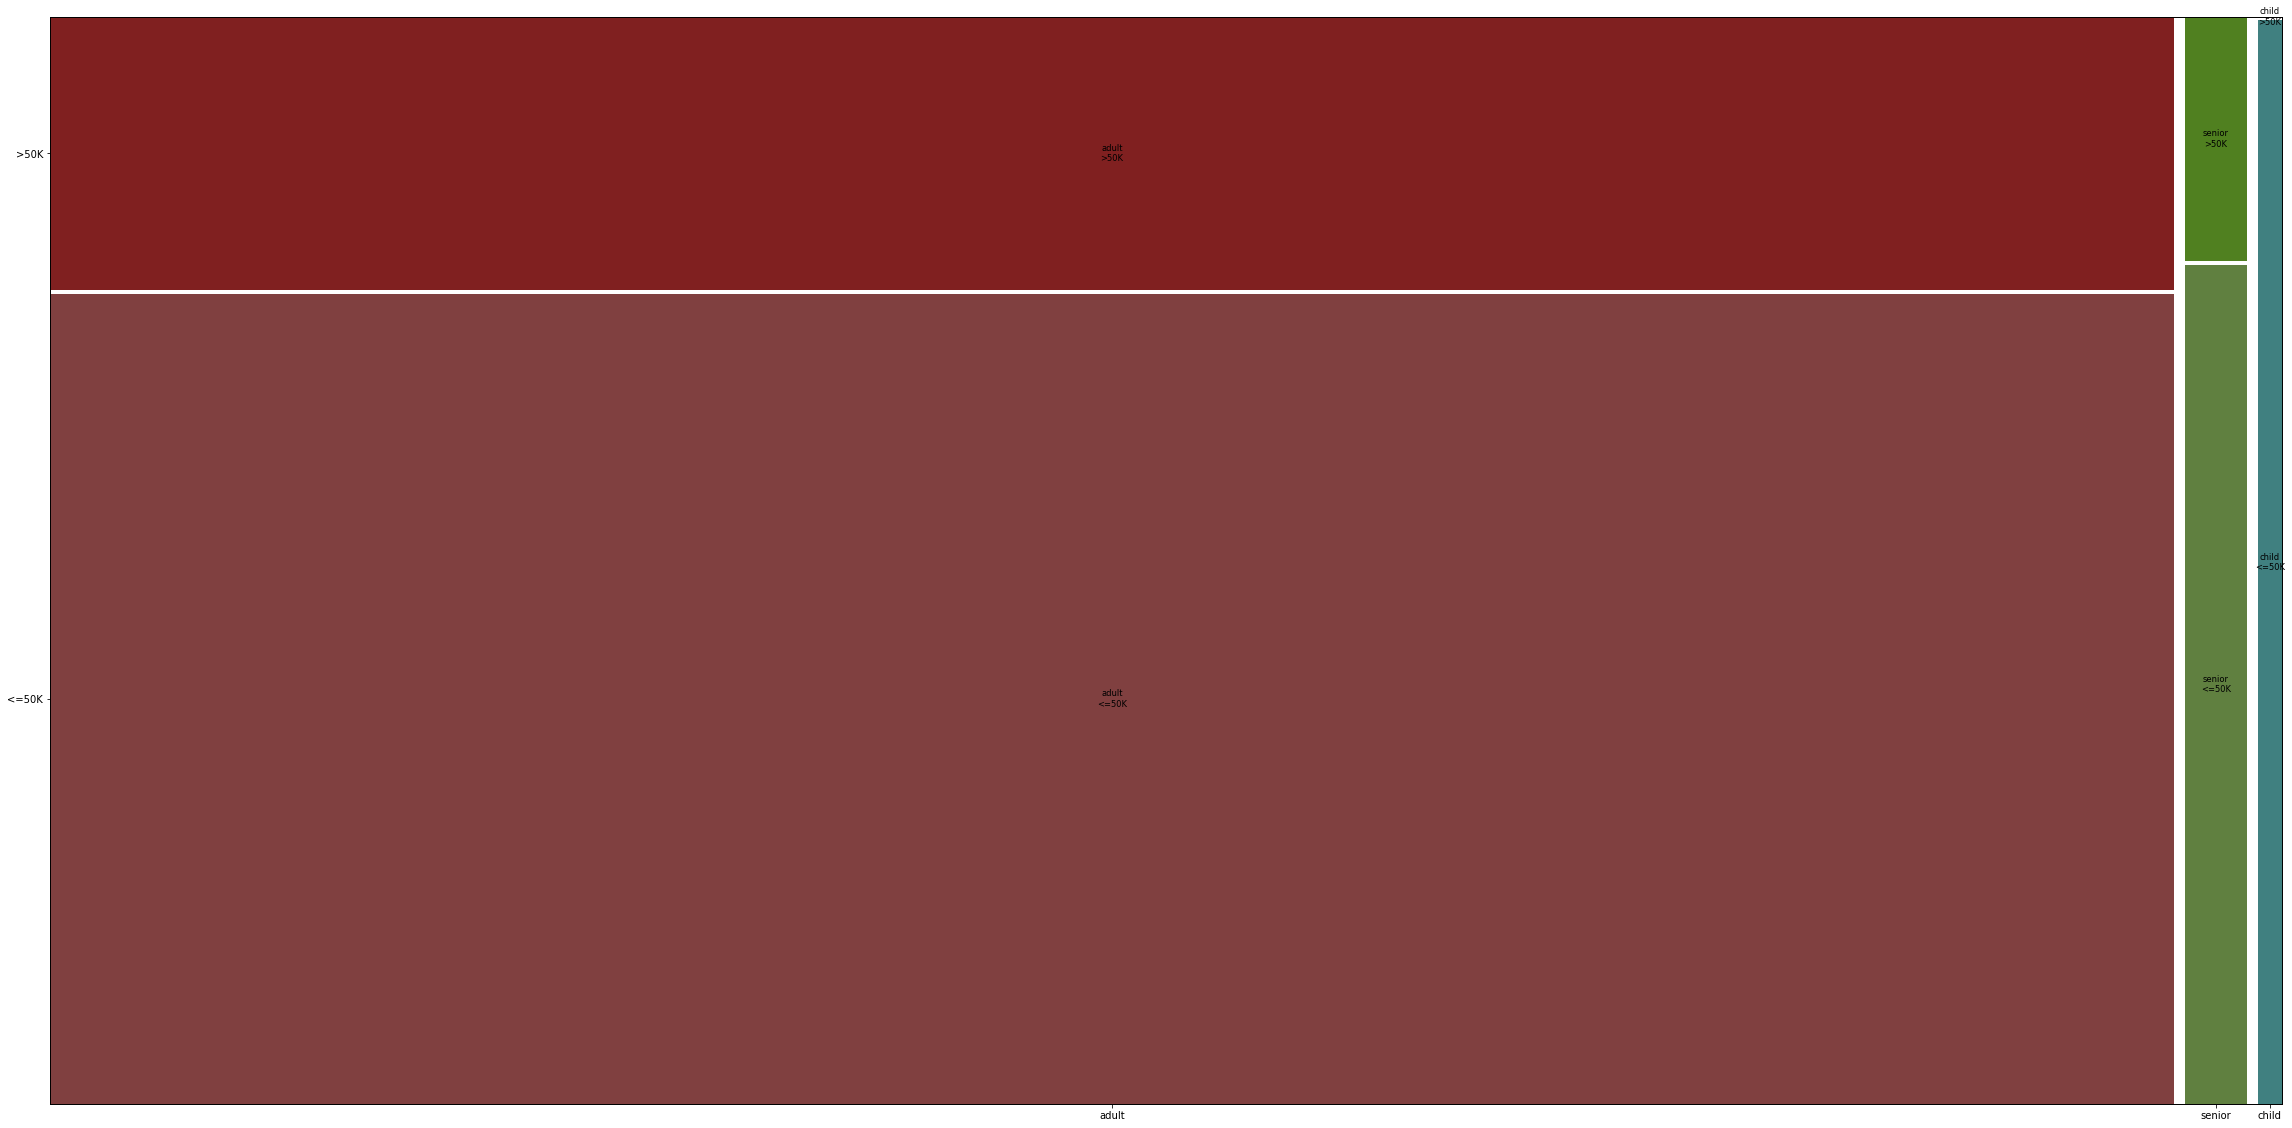

In [39]:
#https://www.statsmodels.org/stable/generated/statsmodels.graphics.mosaicplot.mosaic.html
#https://stackoverflow.com/questions/28517276/changing-fig-size-with-statsmodel -- cel's answer 
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import matplotlib as mpl

mosaic_vars = catagorical_vars

target_var = 'annual_income'
for var in mosaic_vars:
    
    n, m = 40, 20

    with mpl.rc_context():
        mpl.rc("figure", figsize=(n,m))
    
        mosaic(raw_census_95_data,[str(var), target_var], horizontal = True, gap = 0.005)

        plt.show()

In [40]:
continous_features = list(raw_census_95_data.select_dtypes(include='int64').columns)

print(continous_features) 

['age', 'fnlwght', 'education_num_yr', 'cap_gain', 'cap_loss', 'hours_per_week']


In [41]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

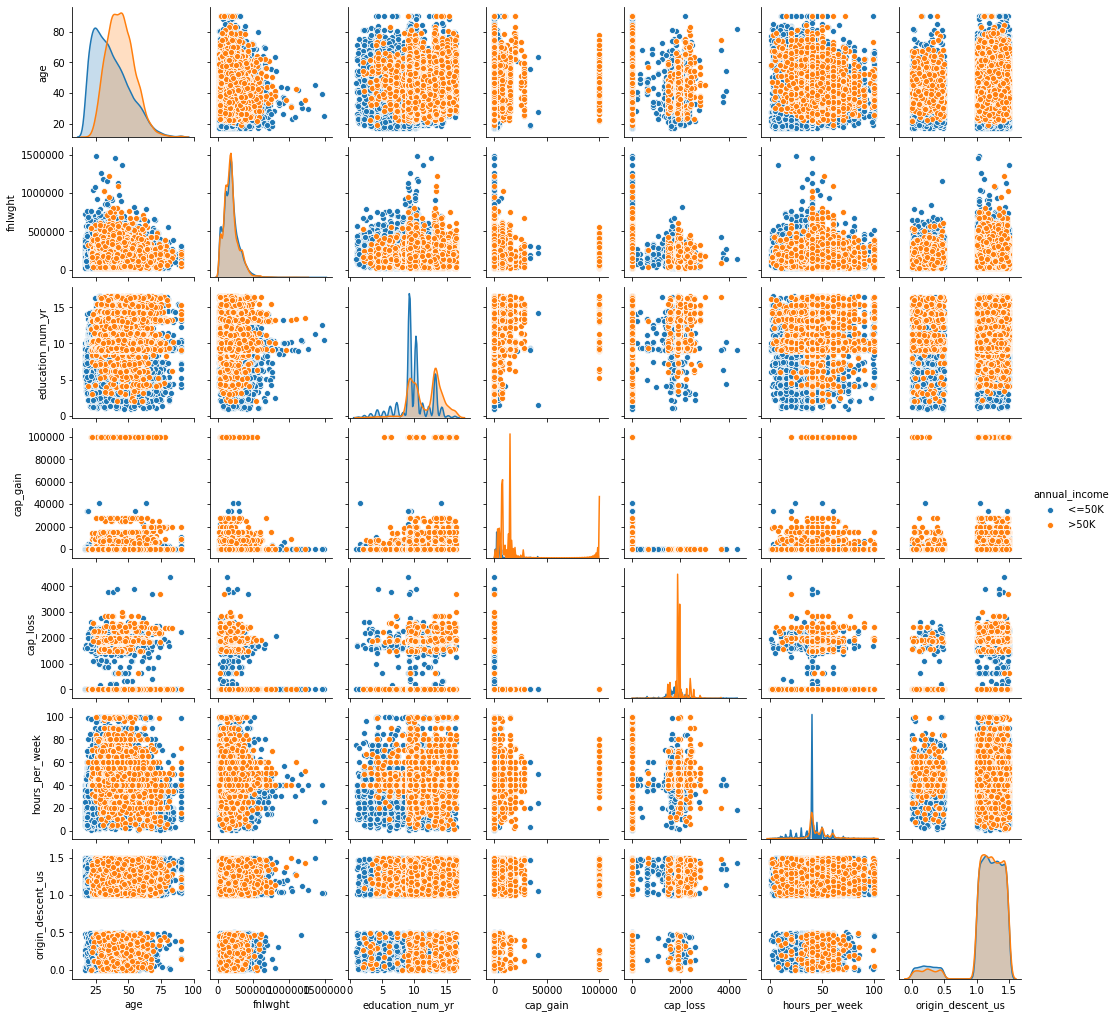

In [42]:
continous_feat_jitter = raw_census_95_data.copy()
continous_feat_jitter['origin_descent_us'] = continous_feat_jitter.origin_descent_us.astype('int64')
continous_features_jitter = list(continous_feat_jitter.select_dtypes(include='int64').columns)
continous_feat_jitter[continous_features_jitter] = continous_feat_jitter[continous_features_jitter].values + np.random.rand(len(continous_feat_jitter),7)/2 
sns.pairplot(continous_feat_jitter,hue = 'annual_income', height=2)

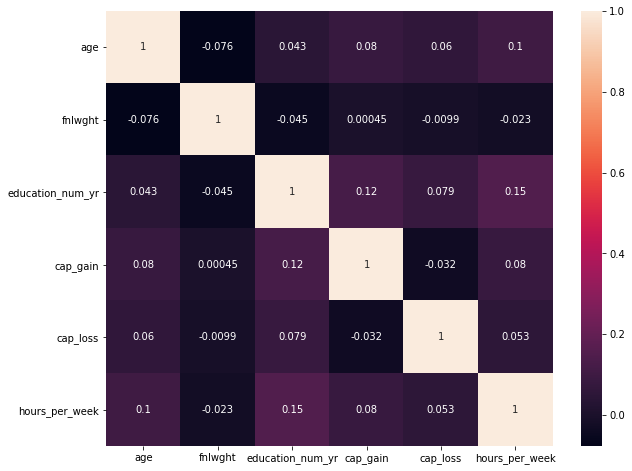

In [43]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,8]
sns.heatmap(raw_census_95_data.corr(), annot = True);

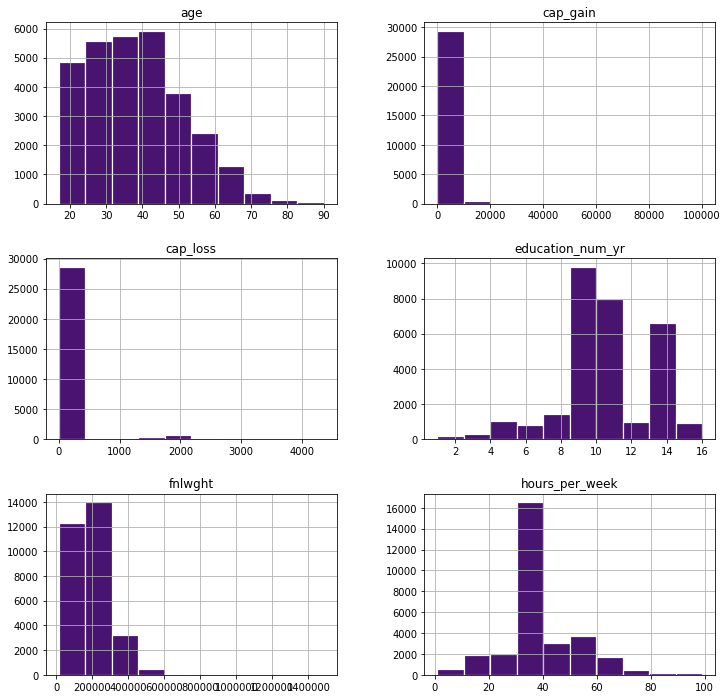

In [44]:
# Distribution of Different Features of the Dataset
distribution = raw_census_95_data.hist( color='#481470', linewidth = 1.2, edgecolor = 'white')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

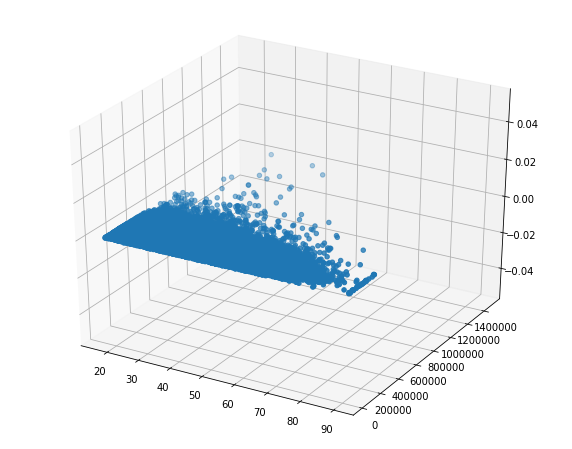

In [45]:
#https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(continous_feat_jitter.age,continous_feat_jitter.fnlwght)
plt.show()

In [ ]:
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html